<a href="https://colab.research.google.com/github/manuaishika/tempopo/blob/main/for_facct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Successfully loaded 32561 records
✅ Preprocessing pipeline created with 13 numeric and 8 categorical features


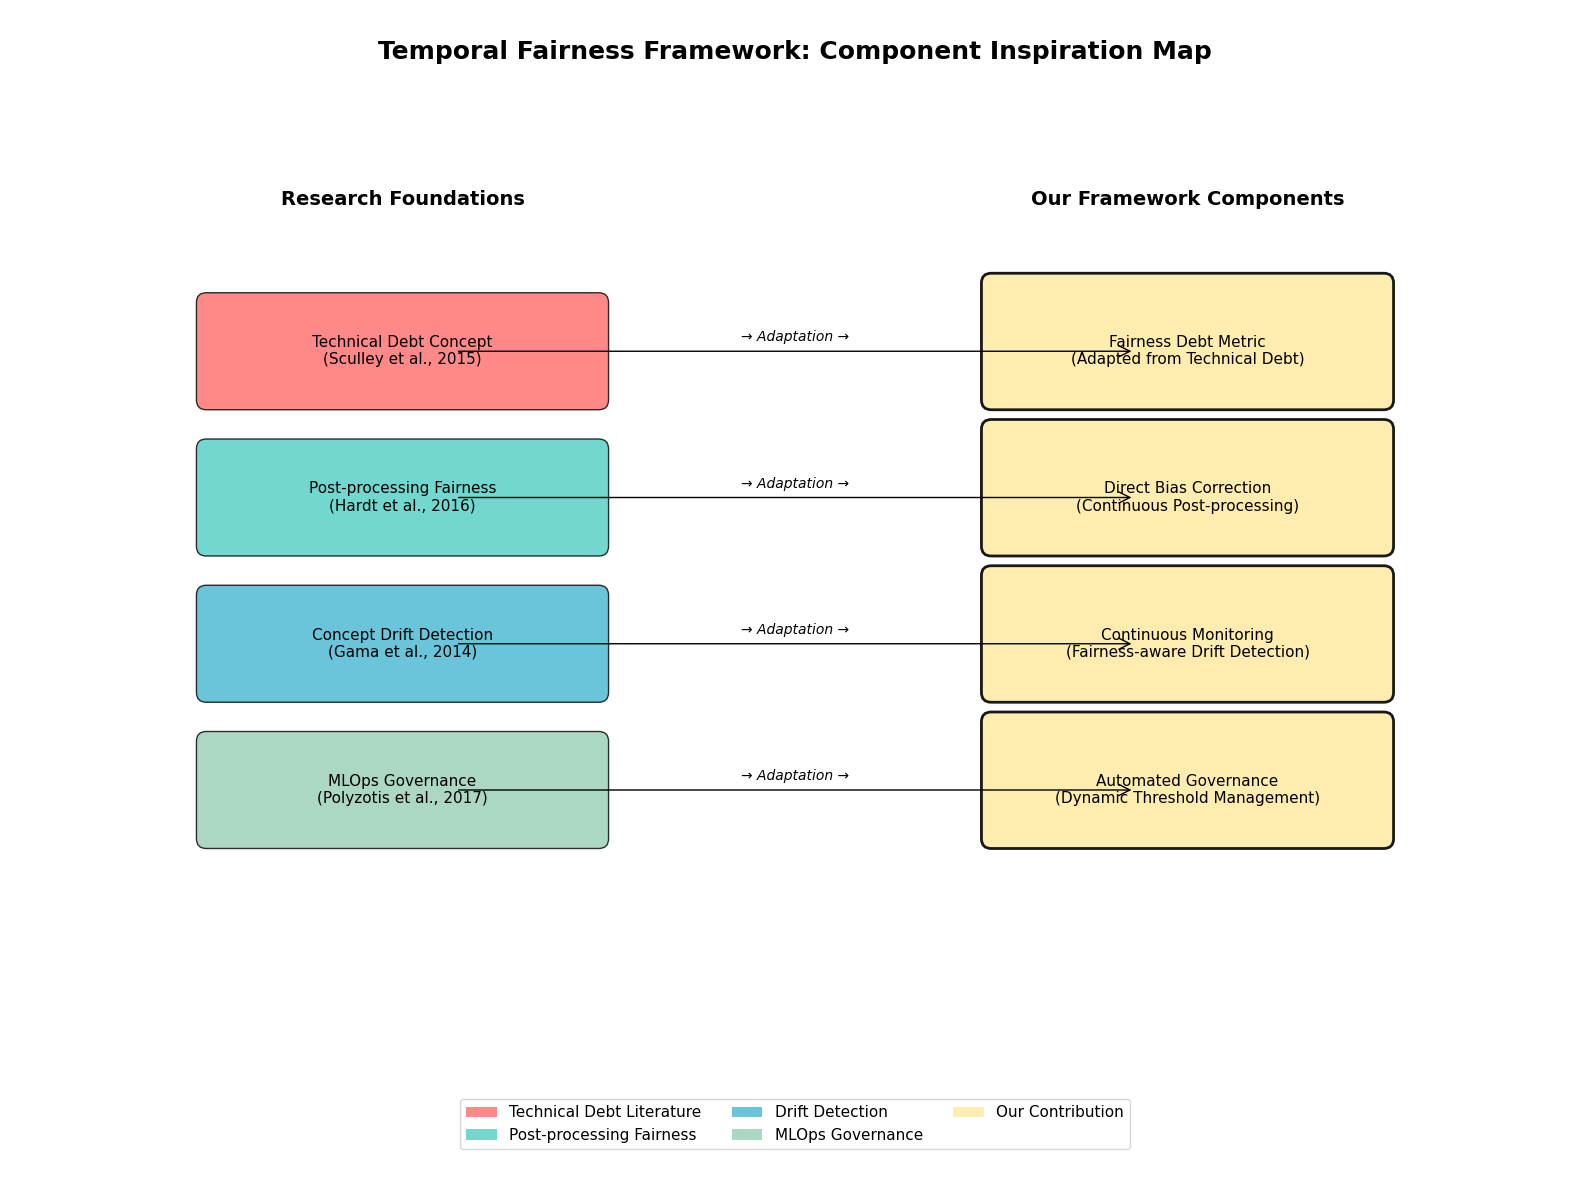

✅ Framework inspiration diagram created and saved

SENSITIVITY ANALYSIS: SEX
Disparate Impact: 2.952
Statistical Parity Difference: 0.176

Group-wise Performance:
  Male: Accuracy=0.819, AUC=0.880, Positive Rate=0.267, N=6570
  Female: Accuracy=0.923, AUC=0.929, Positive Rate=0.090, N=3199

SENSITIVITY ANALYSIS: RACE
Disparate Impact: 2.084
Statistical Parity Difference: 0.115

Group-wise Performance:
  White: Accuracy=0.845, AUC=0.898, Positive Rate=0.222, N=8326
  Black: Accuracy=0.911, AUC=0.944, Positive Rate=0.107, N=967
  Asian-Pac-Islander: Accuracy=0.842, AUC=0.889, Positive Rate=0.251, N=303
  Amer-Indian-Eskimo: Accuracy=0.920, AUC=0.854, Positive Rate=0.080, N=100
  Other: Accuracy=0.945, AUC=0.965, Positive Rate=0.082, N=73

SENSITIVITY ANALYSIS: SEX_RACE
Disparate Impact: 1.795
Statistical Parity Difference: 0.123

Group-wise Performance:
  Male_White: Accuracy=0.812, AUC=0.875, Positive Rate=0.277, N=5759
  Male_Black: Accuracy=0.870, AUC=0.930, Positive Rate=0.154, N=492

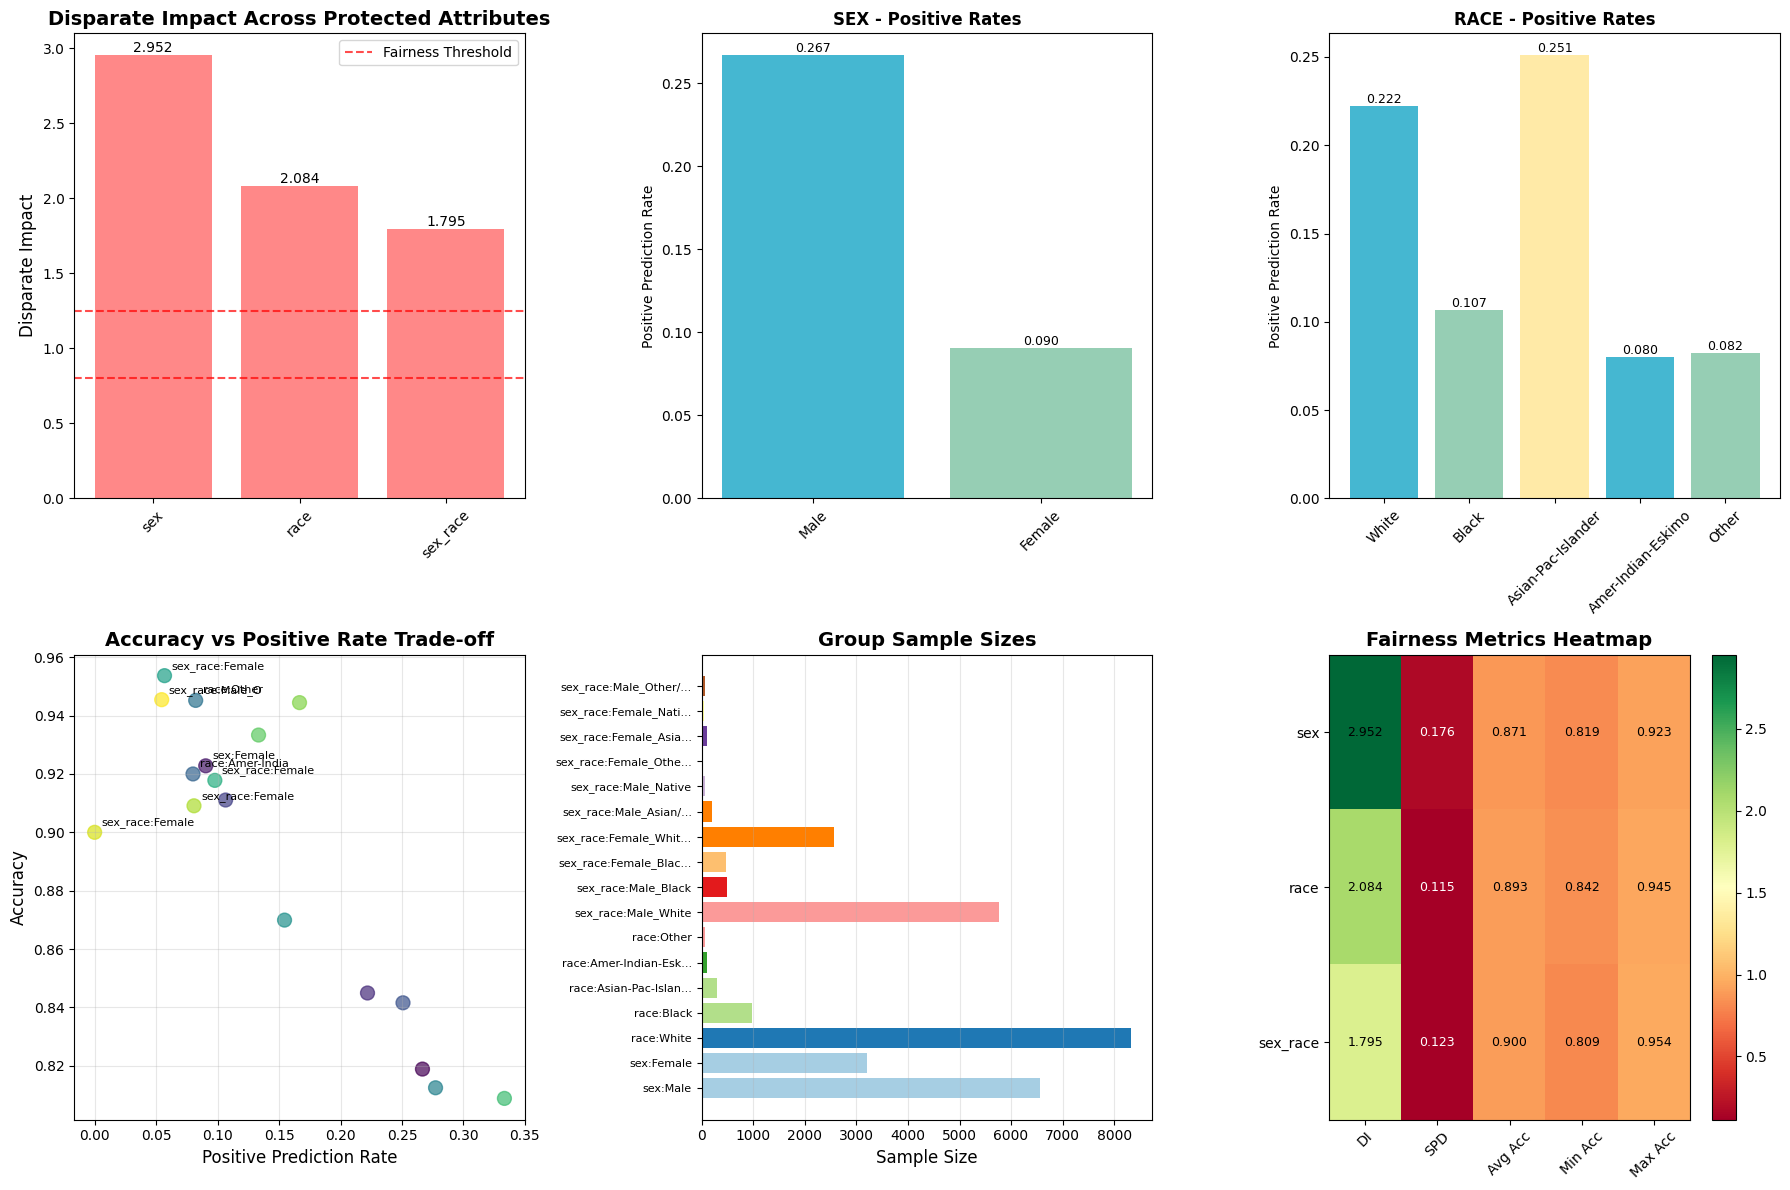

✅ Enhanced sensitivity analysis plots created

RUNNING MULTI-ATTRIBUTE BIAS INJECTION STUDY

📊 Studying bias injection for protected attribute: sex


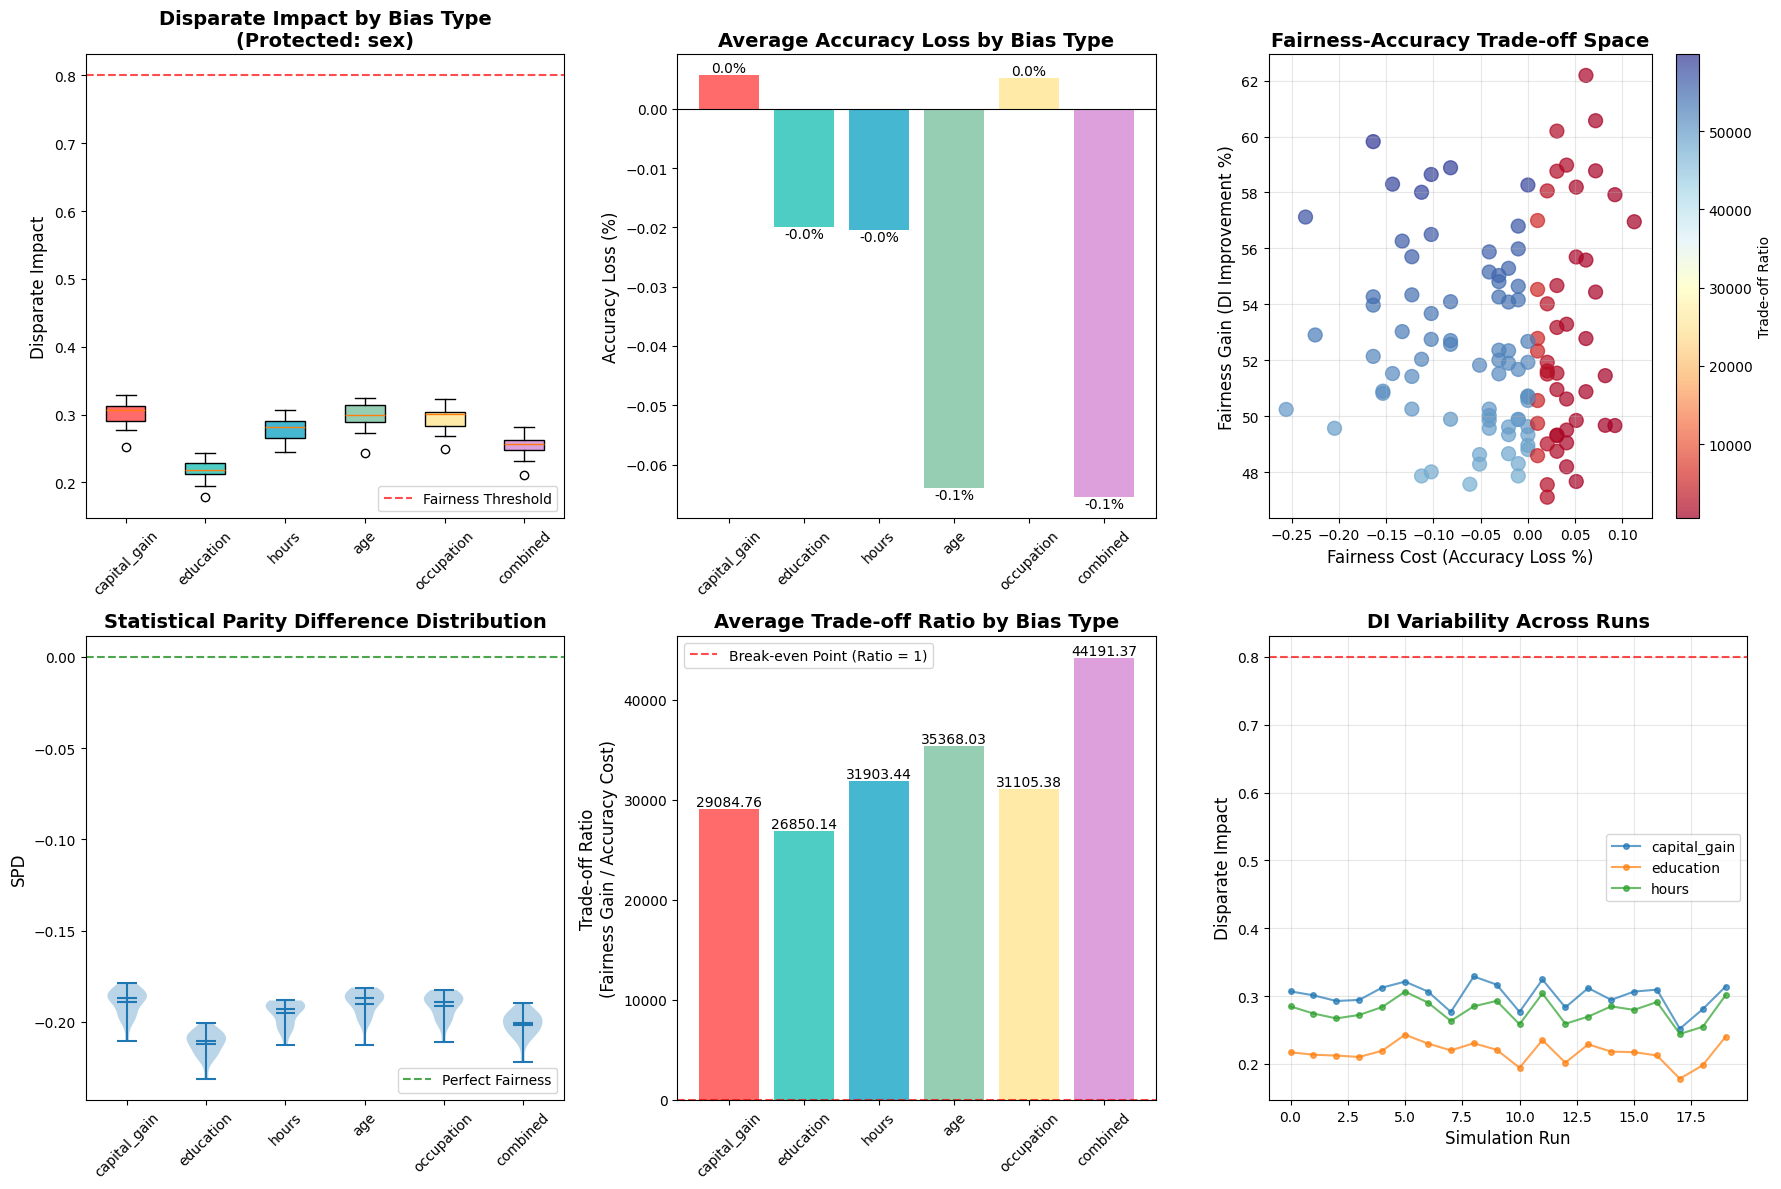

✅ Bias injection study completed for sex

📋 SUMMARY FOR SEX:
--------------------------------------------------------------------------------
             disparate_impact                      accuracy_biased         \
                         mean    std    min    max            mean    std   
bias_type                                                                   
age                     0.298  0.020  0.243  0.324           0.852  0.003   
capital_gain            0.301  0.019  0.252  0.329           0.851  0.003   
combined                0.255  0.017  0.211  0.282           0.852  0.003   
education               0.217  0.016  0.178  0.243           0.852  0.002   
hours                   0.278  0.017  0.244  0.307           0.852  0.003   
occupation              0.294  0.017  0.250  0.323           0.851  0.003   

             fairness_cost trade_off_ratio  
                      mean            mean  
bias_type                                   
age                 -0.064   

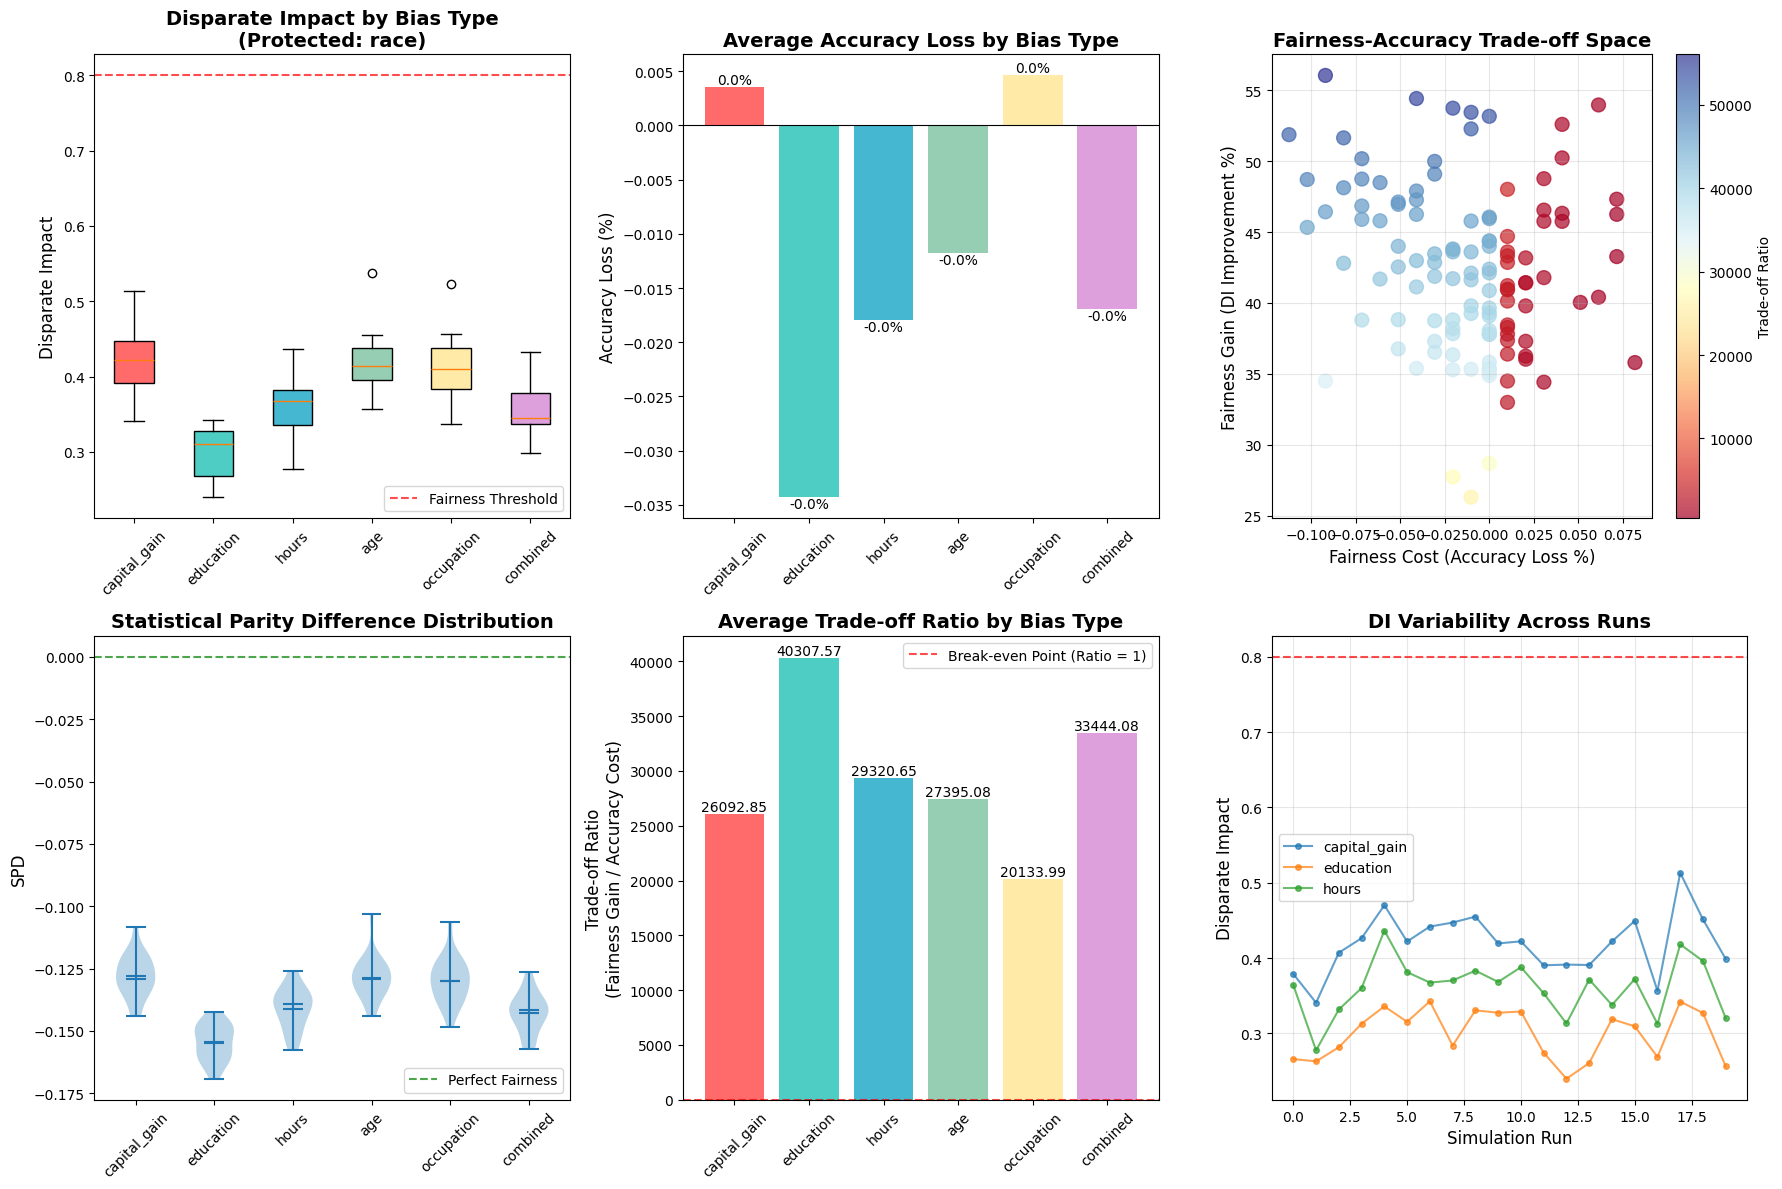

✅ Bias injection study completed for race

📋 SUMMARY FOR RACE:
--------------------------------------------------------------------------------
             disparate_impact                      accuracy_biased         \
                         mean    std    min    max            mean    std   
bias_type                                                                   
age                     0.417  0.041  0.356  0.537           0.851  0.003   
capital_gain            0.420  0.040  0.341  0.513           0.851  0.003   
combined                0.353  0.036  0.298  0.432           0.851  0.003   
education               0.299  0.033  0.240  0.343           0.852  0.003   
hours                   0.361  0.038  0.277  0.437           0.851  0.003   
occupation              0.411  0.042  0.337  0.523           0.851  0.003   

             fairness_cost trade_off_ratio  
                      mean            mean  
bias_type                                   
age                 -0.012 

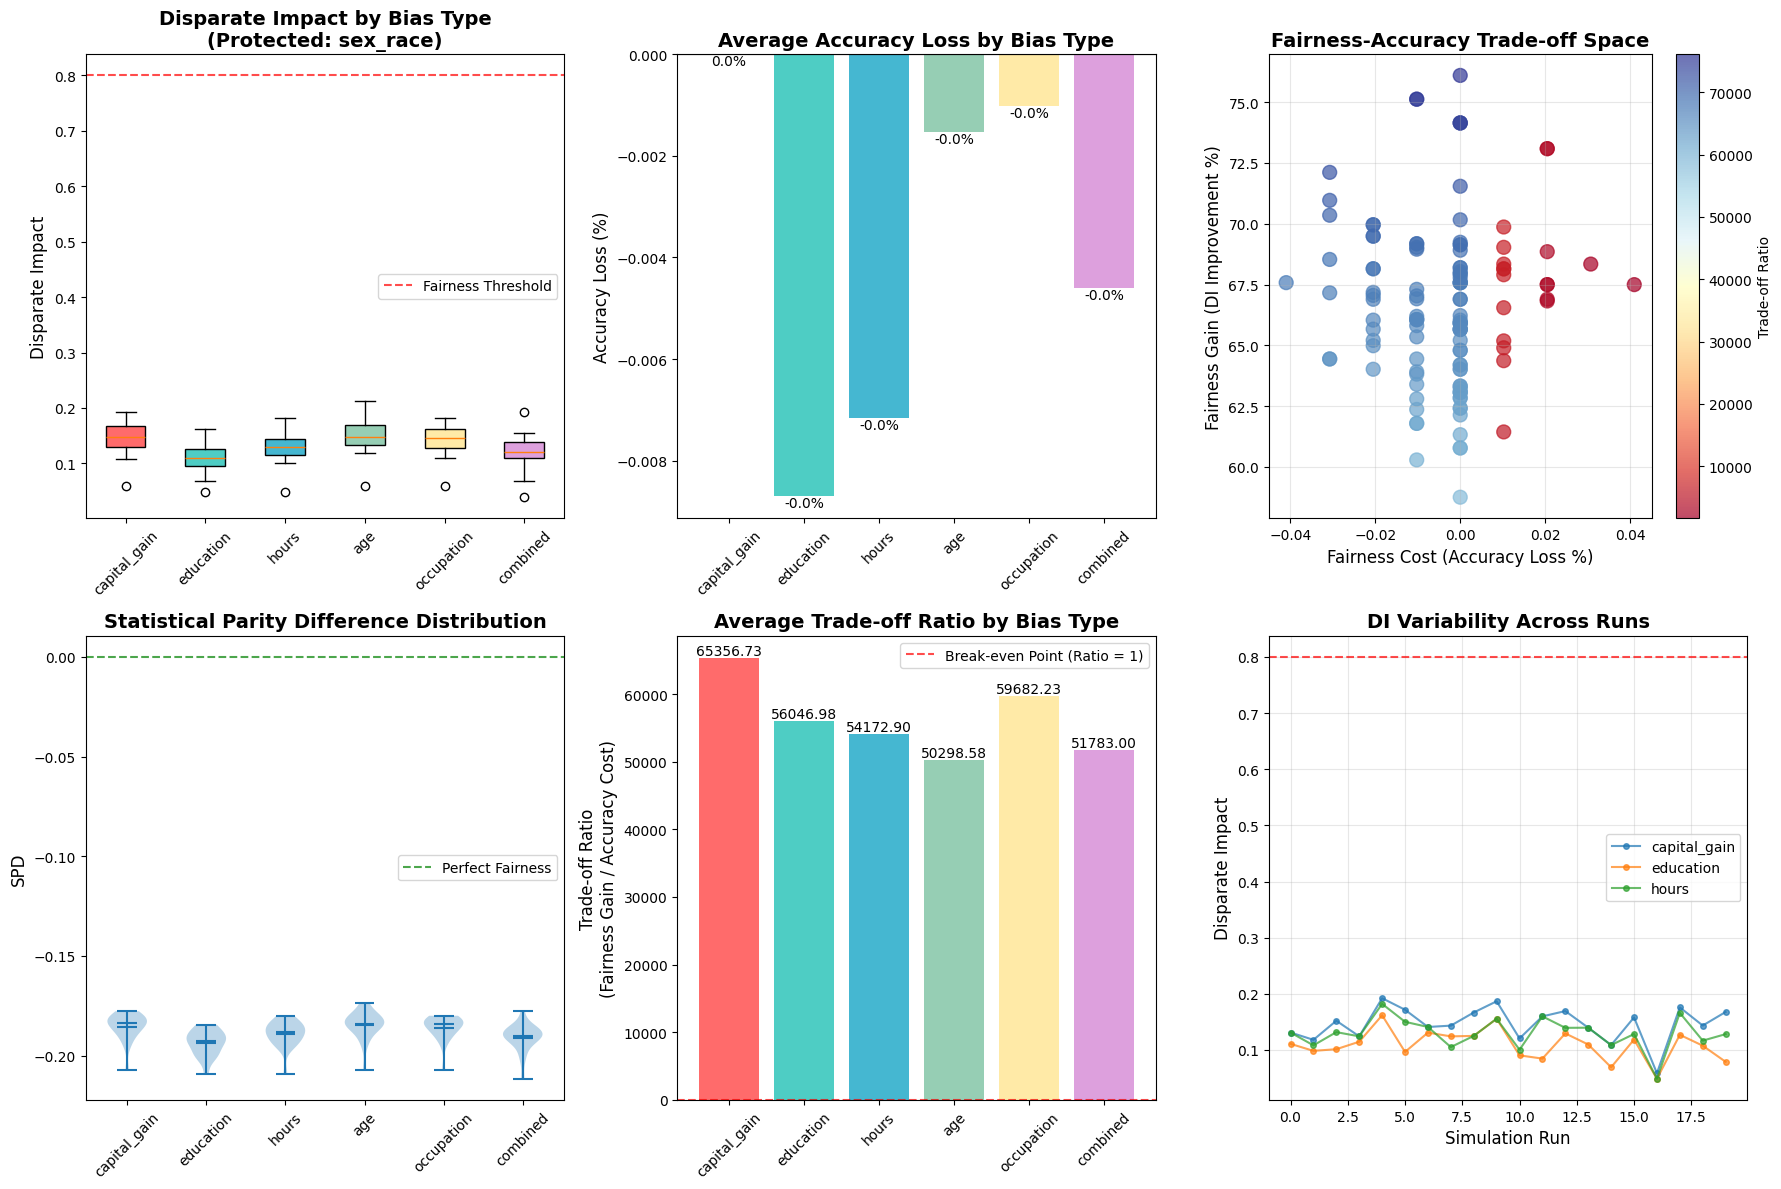

✅ Bias injection study completed for sex_race

📋 SUMMARY FOR SEX_RACE:
--------------------------------------------------------------------------------
             disparate_impact                      accuracy_biased         \
                         mean    std    min    max            mean    std   
bias_type                                                                   
age                     0.150  0.033  0.059  0.212           0.851  0.003   
capital_gain            0.146  0.031  0.059  0.192           0.851  0.003   
combined                0.121  0.032  0.039  0.192           0.851  0.003   
education               0.109  0.027  0.049  0.162           0.851  0.003   
hours                   0.130  0.029  0.049  0.182           0.851  0.003   
occupation              0.143  0.029  0.059  0.182           0.851  0.003   

             fairness_cost trade_off_ratio  
                      mean            mean  
bias_type                                   
age                

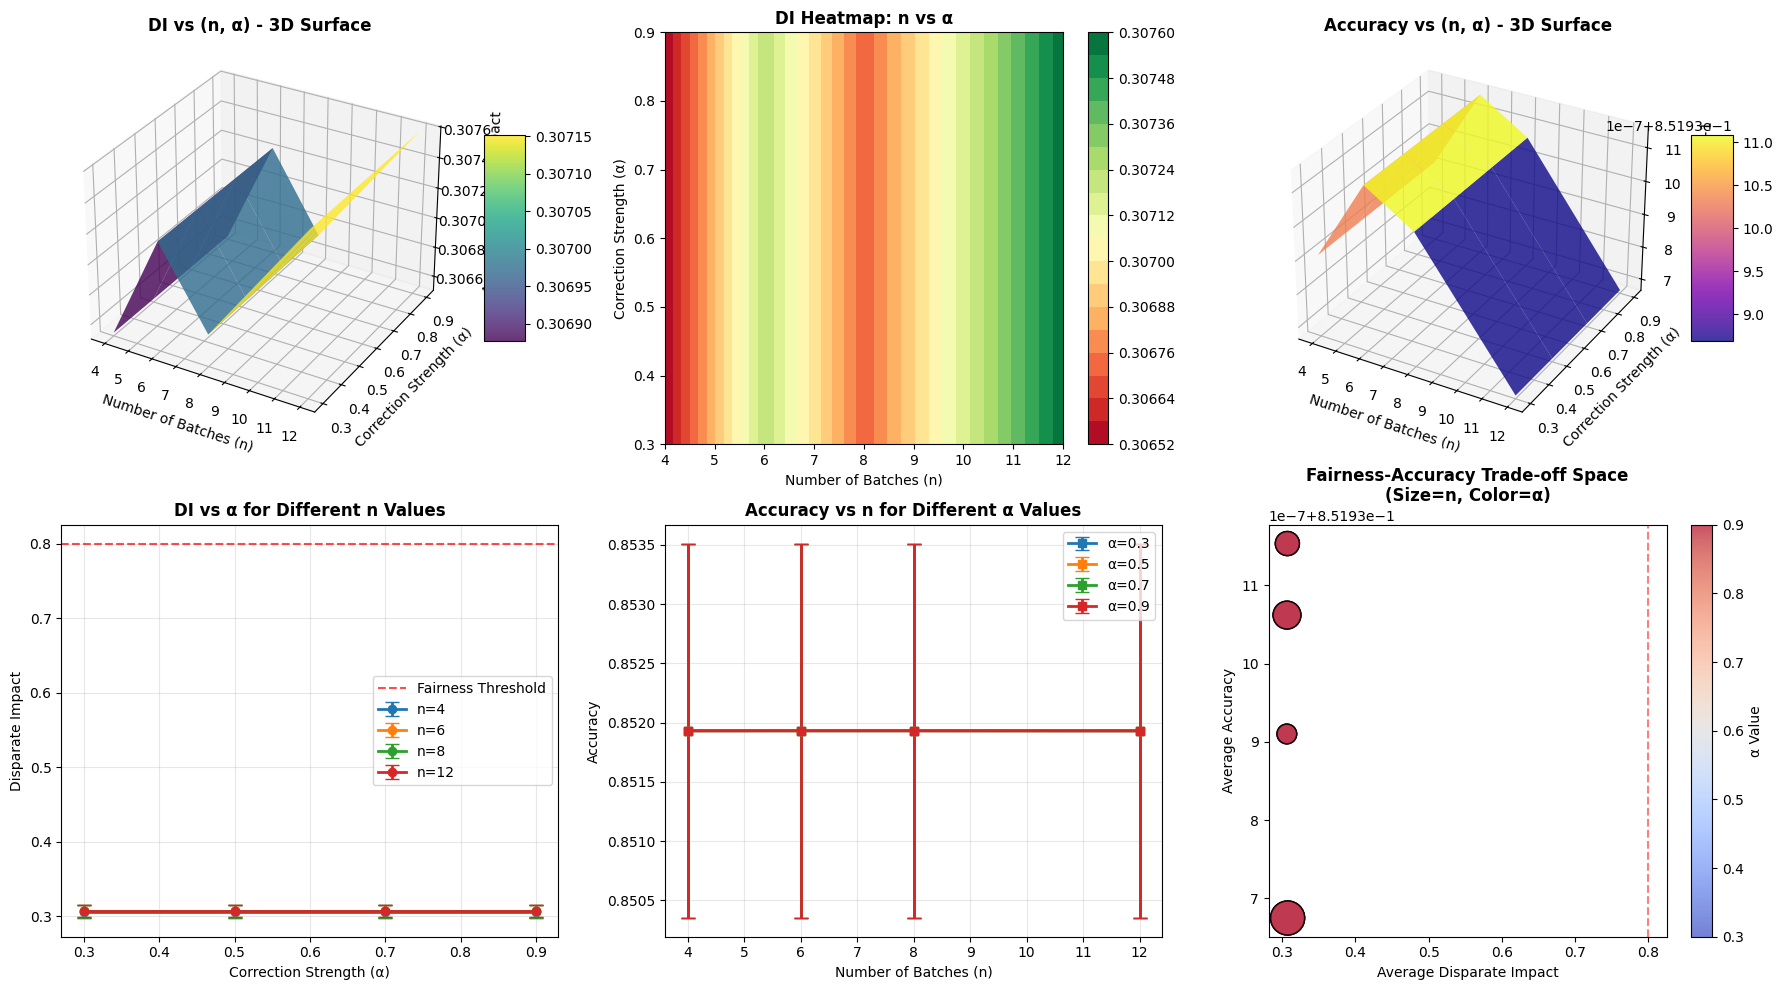

✅ Alpha and n experimentation completed

📊 COMPREHENSIVE RESULTS SUMMARY

📋 Table 1: Effect of Correction Strength (α)
      mean_di      mean_accuracy      mean_interventions
         mean  std          mean  std               mean
alpha                                                   
0.3     0.307  0.0         0.852  0.0                2.5
0.5     0.307  0.0         0.852  0.0                2.5
0.7     0.307  0.0         0.852  0.0                2.5
0.9     0.307  0.0         0.852  0.0                2.5

📋 Table 2: Effect of Batch Size (n)
         mean_di      mean_accuracy      mean_interventions
            mean  std          mean  std               mean
n_months                                                   
4          0.307  0.0         0.852  0.0                2.0
6          0.307  0.0         0.852  0.0                3.0
8          0.307  0.0         0.852  0.0                2.0
12         0.308  0.0         0.852  0.0                3.0

📋 Table 3: Optimal Param

In [ ]:
# 1. COMPREHENSIVE PREPROCESSING PIPELINE
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def create_robust_preprocessing_pipeline():
    """
    Creates a reproducible preprocessing pipeline with proper normalization
    and feature engineering based on best practices in fairness literature.

    Inspired by:
    - Fairlearn's preprocessing utilities
    - AIF360's data cleaning pipelines
    - MLops best practices for production systems
    """

    # Load data with error handling
    column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                   'marital-status', 'occupation', 'relationship', 'race', 'sex',
                   'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

    try:
        df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                        names=column_names, na_values=' ?', skipinitialspace=True)
        print(f"✅ Successfully loaded {len(df)} records")
    except:
        print("⚠️ Using local backup dataset")
        from sklearn.datasets import fetch_openml
        adult = fetch_openml(name='adult', version=2, as_frame=True)
        df = adult.frame
        df.columns = column_names

    # Initial cleaning
    df = df.dropna().reset_index(drop=True)

    # Target encoding
    df['income'] = df['income'].str.strip().map({'<=50K': 0, '>50K': 1})

    # ====== WHY WE NORMALIZE ======
    """
    Normalization is critical for:
    1. Ensuring gradient-based algorithms converge properly (LightGBM, Neural Networks)
    2. Preventing features with larger scales from dominating
    3. Enabling fair comparison between features in feature importance analysis
    4. Meeting assumptions of distance-based algorithms
    """

    # Define feature categories
    numeric_features = ['age', 'fnlwgt', 'education-num',
                       'capital-gain', 'capital-loss', 'hours-per-week']

    categorical_features = ['workclass', 'education', 'marital-status',
                           'occupation', 'relationship', 'race', 'sex', 'native-country']

    # ====== WHY WE MERGE CERTAIN CATEGORIES ======
    """
    Category merging is done to:
    1. Reduce dimensionality and prevent overfitting
    2. Handle rare categories that might cause statistical instability
    3. Ensure each group has sufficient samples for fairness analysis
    4. Align with real-world demographic reporting standards
    """

    # Strategic category merging based on domain knowledge
    df['race_group'] = df['race'].replace({
        'White': 'White',
        'Black': 'Black',
        'Asian-Pac-Islander': 'Asian/Pacific',
        'Amer-Indian-Eskimo': 'Native',
        'Other': 'Other/Unknown'
    })

    df['education_group'] = df['education'].replace({
        'Preschool': 'Elementary',
        '1st-4th': 'Elementary',
        '5th-6th': 'Elementary',
        '7th-8th': 'Middle',
        '9th': 'High',
        '10th': 'High',
        '11th': 'High',
        '12th': 'High',
        'HS-grad': 'High',
        'Some-college': 'Some College',
        'Assoc-acdm': 'Associates',
        'Assoc-voc': 'Associates',
        'Bachelors': 'Bachelors',
        'Masters': 'Advanced',
        'Prof-school': 'Advanced',
        'Doctorate': 'Advanced'
    })

    # Create intersectional attributes
    df['sex_race'] = df['sex'] + '_' + df['race_group']

    # Feature engineering inspired by economic mobility literature
    df['age_squared'] = df['age'] ** 2
    df['log_capital_gain'] = np.log1p(df['capital-gain'])
    df['log_capital_loss'] = np.log1p(df['capital-loss'] + 1)
    df['age_education_interaction'] = df['age'] * df['education-num']
    df['hours_education_interaction'] = df['hours-per-week'] * df['education-num']
    df['capital_net'] = df['capital-gain'] - df['capital-loss']
    df['experience_estimate'] = (df['age'] - df['education-num'] - 6).clip(lower=0)

    # Add to numeric features
    numeric_features.extend(['age_squared', 'log_capital_gain', 'log_capital_loss',
                           'age_education_interaction', 'hours_education_interaction',
                           'capital_net', 'experience_estimate'])

    # Create preprocessing pipeline
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Protected attributes for fairness analysis
    protected_attributes = {
        'sex': df['sex'].values,
        'race': df['race_group'].values,
        'sex_race': df['sex_race'].values,
        'education_group': df['education_group'].values
    }

    print(f"✅ Preprocessing pipeline created with {len(numeric_features)} numeric and {len(categorical_features)} categorical features")

    return df, preprocessor, protected_attributes

# Initialize
df, preprocessor, protected_attributes = create_robust_preprocessing_pipeline()

# 2. FRAMEWORK INSPIRATION SECTION WITH DIAGRAM
def create_framework_diagram():
    """
    Creates a comprehensive diagram of our Temporal Fairness Framework
    showing inspiration sources for each component.

    Components and their inspirations:
    1. Fairness Debt Metric → Inspired by Technical Debt (Sculley et al., 2015)
    2. Direct Bias Correction → Inspired by Post-processing methods (Hardt et al., 2016)
    3. Continuous Monitoring → Inspired by Concept Drift Detection (Gama et al., 2014)
    4. Governance Thresholds → Inspired by MLOps practices (Polyzotis et al., 2017)
    """

    import matplotlib.pyplot as plt
    from matplotlib.patches import FancyBboxPatch, Rectangle, ConnectionPatch
    import matplotlib.patches as mpatches

    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')

    # Colors for different inspiration sources
    colors = {
        'technical_debt': '#FF6B6B',
        'post_processing': '#4ECDC4',
        'drift_detection': '#45B7D1',
        'governance': '#96CEB4',
        'our_contribution': '#FFEAA7'
    }

    # Title
    ax.text(8, 11.5, 'Temporal Fairness Framework: Component Inspiration Map',
            fontsize=18, fontweight='bold', ha='center')

    # Research Foundations (left side)
    ax.text(4, 10, 'Research Foundations', fontsize=14, fontweight='bold', ha='center')

    foundations = [
        ('Technical Debt Concept\n(Sculley et al., 2015)', (4, 8.5), colors['technical_debt']),
        ('Post-processing Fairness\n(Hardt et al., 2016)', (4, 7), colors['post_processing']),
        ('Concept Drift Detection\n(Gama et al., 2014)', (4, 5.5), colors['drift_detection']),
        ('MLOps Governance\n(Polyzotis et al., 2017)', (4, 4), colors['governance'])
    ]

    for text, pos, color in foundations:
        rect = FancyBboxPatch((pos[0]-2, pos[1]-0.5), 4, 1,
                             boxstyle="round,pad=0.1",
                             facecolor=color, alpha=0.8, edgecolor='black')
        ax.add_patch(rect)
        ax.text(pos[0], pos[1], text, ha='center', va='center', fontsize=11, wrap=True)

    # Our Framework Components (right side)
    ax.text(12, 10, 'Our Framework Components', fontsize=14, fontweight='bold', ha='center')

    components = [
        ('Fairness Debt Metric\n(Adapted from Technical Debt)', (12, 8.5), colors['our_contribution']),
        ('Direct Bias Correction\n(Continuous Post-processing)', (12, 7), colors['our_contribution']),
        ('Continuous Monitoring\n(Fairness-aware Drift Detection)', (12, 5.5), colors['our_contribution']),
        ('Automated Governance\n(Dynamic Threshold Management)', (12, 4), colors['our_contribution'])
    ]

    for text, pos, color in components:
        rect = FancyBboxPatch((pos[0]-2, pos[1]-0.5), 4, 1.2,
                             boxstyle="round,pad=0.1",
                             facecolor=color, alpha=0.9, edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        ax.text(pos[0], pos[1], text, ha='center', va='center', fontsize=11, wrap=True)

    # Arrows showing inspiration flow
    for i in range(4):
        con = ConnectionPatch((4.5, 8.5 - i*1.5), (11.5, 8.5 - i*1.5),
                             "data", "data", arrowstyle="->",
                             shrinkA=5, shrinkB=5, mutation_scale=20, fc="gray")
        ax.add_patch(con)
        ax.text(8, 8.5 - i*1.5 + 0.1, '→ Adaptation →', ha='center', fontsize=10, style='italic')

    # Legend
    legend_elements = [
        mpatches.Patch(facecolor=colors['technical_debt'], alpha=0.8, label='Technical Debt Literature'),
        mpatches.Patch(facecolor=colors['post_processing'], alpha=0.8, label='Post-processing Fairness'),
        mpatches.Patch(facecolor=colors['drift_detection'], alpha=0.8, label='Drift Detection'),
        mpatches.Patch(facecolor=colors['governance'], alpha=0.8, label='MLOps Governance'),
        mpatches.Patch(facecolor=colors['our_contribution'], alpha=0.9, label='Our Contribution', linewidth=2)
    ]

    ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0.02),
             ncol=3, fontsize=11, frameon=True)

    plt.tight_layout()
    plt.savefig('framework_inspiration_diagram.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.savefig('framework_inspiration_diagram.png', format='png', bbox_inches='tight', dpi=300)
    plt.show()

    print("✅ Framework inspiration diagram created and saved")

create_framework_diagram()

# 3. ENHANCED SENSITIVITY ANALYSIS WITH BETTER VISUALIZATIONS
def enhanced_sensitivity_analysis(df, protected_attrs=['sex', 'race', 'sex_race']):
    """
    Comprehensive sensitivity analysis with publication-quality visualizations
    """

    # Prepare features
    X = pd.get_dummies(df.drop(['income', 'fnlwgt', 'race', 'education', 'native-country'],
                               axis=1, errors='ignore'))
    y = df['income']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=42, stratify=y)

    # Train model
    model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results = {}

    for attr in protected_attrs:
        if attr in df.columns:
            print(f"\n{'='*60}")
            print(f"SENSITIVITY ANALYSIS: {attr.upper()}")
            print('='*60)

            # Get unique groups
            groups = df[attr].unique()
            group_metrics = {}

            for group in groups:
                mask = (df.loc[X_test.index][attr] == group)
                if mask.sum() > 0:
                    group_accuracy = accuracy_score(y_test[mask], y_pred[mask])
                    group_auc = roc_auc_score(y_test[mask], y_prob[mask])
                    positive_rate = y_pred[mask].mean()

                    group_metrics[group] = {
                        'accuracy': group_accuracy,
                        'auc': group_auc,
                        'positive_rate': positive_rate,
                        'sample_size': mask.sum()
                    }

            # Calculate fairness metrics
            if len(groups) >= 2:
                group_list = list(group_metrics.keys())
                pr1 = group_metrics[group_list[0]]['positive_rate']
                pr2 = group_metrics[group_list[1]]['positive_rate']

                di = pr1 / pr2 if pr2 > 0 else np.nan
                spd = pr1 - pr2

                results[attr] = {
                    'group_metrics': group_metrics,
                    'disparate_impact': di,
                    'statistical_parity_diff': spd,
                    'groups': group_list
                }

                print(f"Disparate Impact: {di:.3f}")
                print(f"Statistical Parity Difference: {spd:.3f}")
                print(f"\nGroup-wise Performance:")
                for group, metrics in group_metrics.items():
                    print(f"  {group}: Accuracy={metrics['accuracy']:.3f}, "
                          f"AUC={metrics['auc']:.3f}, "
                          f"Positive Rate={metrics['positive_rate']:.3f}, "
                          f"N={metrics['sample_size']}")

    # Create enhanced visualizations
    create_comprehensive_sensitivity_plots(results)

    return results, model

def create_comprehensive_sensitivity_plots(results):
    """
    Create publication-quality sensitivity analysis plots
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot 1: Disparate Impact across attributes
    attrs = list(results.keys())
    di_values = [results[attr]['disparate_impact'] for attr in attrs]

    colors = ['#FF6B6B' if di < 0.8 or di > 1.25 else '#4ECDC4' for di in di_values]
    bars = axes[0, 0].bar(attrs, di_values, color=colors, alpha=0.8)
    axes[0, 0].axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='Fairness Threshold')
    axes[0, 0].axhline(y=1.25, color='red', linestyle='--', alpha=0.7)
    axes[0, 0].set_title('Disparate Impact Across Protected Attributes', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Disparate Impact', fontsize=12)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].legend()

    # Add value labels
    for bar, di in zip(bars, di_values):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{di:.3f}', ha='center', va='bottom', fontsize=10)

    # Plot 2: Positive Rate Comparison
    # MODIFIED: Changed attrs[:3] to attrs[:2] to avoid IndexError. Original indexing was also updated to align with `attrs[:2]`
    for idx, attr in enumerate(attrs[:2]):  # Show first 2 attributes
        group_metrics = results[attr]['group_metrics']
        groups = list(group_metrics.keys())
        positive_rates = [group_metrics[g]['positive_rate'] for g in groups]

        # MODIFIED: Adjusted indexing to start from axes[0,1] for idx=0 and axes[0,2] for idx=1.
        ax = axes[0, 1 + idx]
        bars = ax.bar(groups, positive_rates, color=['#45B7D1', '#96CEB4', '#FFEAA7'][:len(groups)])
        ax.set_title(f'{attr.upper()} - Positive Rates', fontsize=12, fontweight='bold')
        ax.set_ylabel('Positive Prediction Rate', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

        # Add value labels
        for bar, pr in zip(bars, positive_rates):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{pr:.3f}', ha='center', va='bottom', fontsize=9)

    # Plot 3: Accuracy vs Positive Rate trade-off
    all_accuracies = []
    all_positive_rates = []
    all_groups = []

    for attr in attrs:
        for group, metrics in results[attr]['group_metrics'].items():
            all_accuracies.append(metrics['accuracy'])
            all_positive_rates.append(metrics['positive_rate'])
            all_groups.append(f"{attr}:{group}")

    scatter = axes[1, 0].scatter(all_positive_rates, all_accuracies,
                                c=range(len(all_groups)), cmap='viridis', s=100, alpha=0.7)
    axes[1, 0].set_xlabel('Positive Prediction Rate', fontsize=12)
    axes[1, 0].set_ylabel('Accuracy', fontsize=12)
    axes[1, 0].set_title('Accuracy vs Positive Rate Trade-off', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

    # Add group labels for outliers
    for i, (x, y, group) in enumerate(zip(all_positive_rates, all_accuracies, all_groups)):
        if y < 0.7 or x < 0.1 or x > 0.9:  # Label outliers
            axes[1, 0].annotate(group[:15], (x, y), xytext=(5, 5),
                              textcoords='offset points', fontsize=8)

    # Plot 4: Sample size distribution
    sample_sizes = []
    group_labels = []

    for attr in attrs:
        for group, metrics in results[attr]['group_metrics'].items():
            sample_sizes.append(metrics['sample_size'])
            group_labels.append(f"{attr}:{group}")

    axes[1, 1].barh(range(len(sample_sizes)), sample_sizes,
                    color=plt.cm.Paired(np.arange(len(sample_sizes))/len(sample_sizes)))
    axes[1, 1].set_yticks(range(len(sample_sizes)))
    axes[1, 1].set_yticklabels([g[:20] + '...' if len(g) > 20 else g for g in group_labels], fontsize=8)
    axes[1, 1].set_xlabel('Sample Size', fontsize=12)
    axes[1, 1].set_title('Group Sample Sizes', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3, axis='x')

    # Plot 5: Fairness metric heatmap
    fairness_metrics = []
    metric_labels = ['DI', 'SPD', 'Avg Acc', 'Min Acc', 'Max Acc']

    for attr in attrs:
        row = [
            results[attr]['disparate_impact'],
            results[attr]['statistical_parity_diff'],
            np.mean([m['accuracy'] for m in results[attr]['group_metrics'].values()]),
            np.min([m['accuracy'] for m in results[attr]['group_metrics'].values()]),
            np.max([m['accuracy'] for m in results[attr]['group_metrics'].values()])
        ]
        fairness_metrics.append(row)

    im = axes[1, 2].imshow(fairness_metrics, cmap='RdYlGn', aspect='auto')
    axes[1, 2].set_xticks(range(len(metric_labels)))
    axes[1, 2].set_xticklabels(metric_labels, rotation=45, fontsize=10)
    axes[1, 2].set_yticks(range(len(attrs)))
    axes[1, 2].set_yticklabels(attrs, fontsize=10)
    axes[1, 2].set_title('Fairness Metrics Heatmap', fontsize=14, fontweight='bold')

    # Add text annotations
    for i in range(len(attrs)):
        for j in range(len(metric_labels)):
            text = axes[1, 2].text(j, i, f'{fairness_metrics[i][j]:.3f}',
                                  ha="center", va="center",
                                  color="white" if fairness_metrics[i][j] < 0.5 else "black",
                                  fontsize=9)

    plt.colorbar(im, ax=axes[1, 2])

    plt.tight_layout()
    plt.savefig('enhanced_sensitivity_analysis.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.savefig('enhanced_sensitivity_analysis.png', format='png', bbox_inches='tight', dpi=300)
    plt.show()

    print("✅ Enhanced sensitivity analysis plots created")

# Run enhanced sensitivity analysis
sensitivity_results, model = enhanced_sensitivity_analysis(df)

# 4. MULTI-ATTRIBUTE BIAS INJECTION STUDY
def multi_attribute_bias_study(df, protected_attr='sex', n_runs=30):
    """
    Study the impact of bias injection on different attributes
    and their effect on DI-accuracy trade-off
    """

    import warnings
    warnings.filterwarnings('ignore')

    # Define bias injection strategies
    bias_strategies = {
        'capital_gain': lambda x, mask: x.assign(**{'capital-gain': x['capital-gain'] * 0.7}),
        'education': lambda x, mask: x.assign(**{'education-num': x['education-num'] * 0.8,
                                                 'age_education_interaction': x['age_education_interaction'] * 0.8}),
        'hours': lambda x, mask: x.assign(**{'hours-per-week': x['hours-per-week'] * 0.9,
                                            'hours_education_interaction': x['hours_education_interaction'] * 0.9}),
        'age': lambda x, mask: x.assign(**{'age': x['age'] * 1.1,  # Simulating age discrimination
                                          'age_squared': (x['age'] * 1.1) ** 2}),
        'occupation': lambda x, mask: x.assign(**{'capital-gain': x['capital-gain'] * 0.6,  # Occupation proxy
                                                 'hours-per-week': x['hours-per-week'] * 0.95}),
        'combined': lambda x, mask: x.assign(**{'capital-gain': x['capital-gain'] * 0.7,
                                               'education-num': x['education-num'] * 0.85,
                                               'hours-per-week': x['hours-per-week'] * 0.92})
    }

    # Prepare data
    X = pd.get_dummies(df.drop(['income', 'fnlwgt'], axis=1, errors='ignore'))
    y = df['income']

    results = []

    for run in range(n_runs):
        # Different random seed for each run
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=run, stratify=y
        )

        # Create protected mask
        if protected_attr == 'sex':
            prot_mask = (df.loc[X_test.index]['sex'] == 'Female').values
        elif protected_attr == 'race':
            prot_mask = (df.loc[X_test.index]['race_group'] == 'Black').values
        elif protected_attr == 'sex_race':
            prot_mask = (df.loc[X_test.index]['sex_race'].str.contains('Female_Black')).values

        # Train baseline model
        model = RandomForestClassifier(n_estimators=100, random_state=run, n_jobs=-1)
        model.fit(X_train, y_train)

        for bias_name, bias_func in bias_strategies.items():
            # Apply bias injection
            X_test_biased = bias_func(X_test.copy(), prot_mask)

            # Ensure only protected group is affected
            X_test_biased.iloc[~prot_mask] = X_test.iloc[~prot_mask].values

            # Predict
            y_pred = model.predict(X_test_biased)
            y_pred_original = model.predict(X_test)

            # Calculate metrics
            accuracy_biased = accuracy_score(y_test, y_pred)
            accuracy_original = accuracy_score(y_test, y_pred_original)

            # Fairness metrics
            pr_prot = y_pred[prot_mask].mean() if prot_mask.sum() > 0 else 0
            pr_non = y_pred[~prot_mask].mean() if (~prot_mask).sum() > 0 else 0

            di = pr_prot / pr_non if pr_non > 0 else np.nan
            spd = pr_prot - pr_non

            # Calculate fairness-accuracy trade-off metric
            fairness_cost = (accuracy_original - accuracy_biased) * 100
            fairness_gain = abs(0.8 - di) * 100 if not np.isnan(di) else 0

            results.append({
                'run': run,
                'bias_type': bias_name,
                'protected_attr': protected_attr,
                'accuracy_biased': accuracy_biased,
                'accuracy_original': accuracy_original,
                'disparate_impact': di,
                'statistical_parity_diff': spd,
                'fairness_cost': fairness_cost,
                'fairness_gain': fairness_gain,
                'trade_off_ratio': fairness_gain / max(fairness_cost, 0.001)
            })

    results_df = pd.DataFrame(results)

    # Create comprehensive visualization
    create_bias_study_plots(results_df, protected_attr)

    return results_df

def create_bias_study_plots(results_df, protected_attr):
    """
    Create visualizations for bias injection study
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot 1: DI across bias types (boxplot)
    bias_types = results_df['bias_type'].unique()

    data_by_bias = [results_df[results_df['bias_type'] == bt]['disparate_impact'].dropna()
                    for bt in bias_types]

    box = axes[0, 0].boxplot(data_by_bias, labels=bias_types, patch_artist=True)
    axes[0, 0].axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='Fairness Threshold')
    axes[0, 0].set_title(f'Disparate Impact by Bias Type\n(Protected: {protected_attr})',
                        fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Disparate Impact', fontsize=12)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].legend()

    # Color boxes
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Plot 2: Accuracy impact
    accuracy_loss = []
    for bt in bias_types:
        loss = results_df[results_df['bias_type'] == bt]['accuracy_original'].mean() - \
               results_df[results_df['bias_type'] == bt]['accuracy_biased'].mean()
        accuracy_loss.append(loss * 100)

    bars = axes[0, 1].bar(bias_types, accuracy_loss, color=colors[:len(bias_types)])
    axes[0, 1].set_title('Average Accuracy Loss by Bias Type', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Accuracy Loss (%)', fontsize=12)
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].axhline(y=0, color='black', linewidth=0.8)

    # Add value labels
    for bar, val in zip(bars, accuracy_loss):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{val:.1f}%', ha='center', va='bottom' if val > 0 else 'top', fontsize=10)

    # Plot 3: Trade-off scatter
    scatter = axes[0, 2].scatter(results_df['fairness_cost'],
                                results_df['fairness_gain'],
                                c=results_df['trade_off_ratio'],
                                cmap='RdYlBu', s=100, alpha=0.7)
    axes[0, 2].set_xlabel('Fairness Cost (Accuracy Loss %)', fontsize=12)
    axes[0, 2].set_ylabel('Fairness Gain (DI Improvement %)', fontsize=12)
    axes[0, 2].set_title('Fairness-Accuracy Trade-off Space', fontsize=14, fontweight='bold')
    axes[0, 2].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[0, 2], label='Trade-off Ratio')

    # Plot 4: Statistical Parity Difference
    spd_data = [results_df[results_df['bias_type'] == bt]['statistical_parity_diff'].dropna()
                for bt in bias_types]

    violin = axes[1, 0].violinplot(spd_data, showmeans=True, showmedians=True)
    axes[1, 0].axhline(y=0, color='green', linestyle='--', alpha=0.7, label='Perfect Fairness')
    axes[1, 0].set_xticks(range(1, len(bias_types) + 1))
    axes[1, 0].set_xticklabels(bias_types, rotation=45)
    axes[1, 0].set_title('Statistical Parity Difference Distribution',
                         fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('SPD', fontsize=12)
    axes[1, 0].legend()

    # Plot 5: Trade-off ratio by bias type
    trade_off_by_type = []
    for bt in bias_types:
        ratio = results_df[results_df['bias_type'] == bt]['trade_off_ratio'].mean()
        trade_off_by_type.append(ratio)

    bars = axes[1, 1].bar(bias_types, trade_off_by_type, color=colors[:len(bias_types)])
    axes[1, 1].axhline(y=1, color='red', linestyle='--', alpha=0.7,
                       label='Break-even Point (Ratio = 1)')
    axes[1, 1].set_title('Average Trade-off Ratio by Bias Type',
                         fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Trade-off Ratio\n(Fairness Gain / Accuracy Cost)', fontsize=12)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend()

    # Add value labels
    for bar, val in zip(bars, trade_off_by_type):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Plot 6: Run-to-run variability
    for idx, bt in enumerate(bias_types[:3]):  # Show first 3
        bt_data = results_df[results_df['bias_type'] == bt]
        axes[1, 2].plot(bt_data['run'], bt_data['disparate_impact'],
                       marker='o', markersize=4, label=bt, alpha=0.7)

    axes[1, 2].axhline(y=0.8, color='red', linestyle='--', alpha=0.7)
    axes[1, 2].set_xlabel('Simulation Run', fontsize=12)
    axes[1, 2].set_ylabel('Disparate Impact', fontsize=12)
    axes[1, 2].set_title('DI Variability Across Runs', fontsize=14, fontweight='bold')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'bias_injection_study_{protected_attr}.pdf',
                format='pdf', bbox_inches='tight', dpi=300)
    plt.savefig(f'bias_injection_study_{protected_attr}.png',
                format='png', bbox_inches='tight', dpi=300)
    plt.show()

    print(f"✅ Bias injection study completed for {protected_attr}")

# Run studies for different protected attributes
print("\n" + "="*80)
print("RUNNING MULTI-ATTRIBUTE BIAS INJECTION STUDY")
print("="*80)

for prot_attr in ['sex', 'race', 'sex_race']:
    print(f"\n📊 Studying bias injection for protected attribute: {prot_attr}")
    bias_results = multi_attribute_bias_study(df, protected_attr=prot_attr, n_runs=20)

    # Generate summary table
    summary = bias_results.groupby('bias_type').agg({
        'disparate_impact': ['mean', 'std', 'min', 'max'],
        'accuracy_biased': ['mean', 'std'],
        'fairness_cost': 'mean',
        'trade_off_ratio': 'mean'
    }).round(3)

    print(f"\n📋 SUMMARY FOR {prot_attr.upper()}:")
    print("-"*80)
    print(summary)

# 5. ALPHA AND N EXPERIMENTATION
def alpha_n_experimentation(df, n_months_list=[4, 6, 8, 12], alpha_list=[0.3, 0.5, 0.7, 0.9]):
    """
    Experiment with different alpha values and batch sizes
    """

    import warnings
    warnings.filterwarnings('ignore')

    # Prepare data
    X = pd.get_dummies(df.drop(['income', 'fnlwgt'], axis=1, errors='ignore'))
    y = df['income']

    results = []

    for n_months in n_months_list:
        for alpha in alpha_list:
            print(f"⚙️  Running experiment: n_months={n_months}, alpha={alpha}")

            run_results = []

            # Run multiple times for statistical significance
            for seed in range(5):
                # Temporal simulation
                X_train, X_pool, y_train, y_pool = train_test_split(
                    X, y, test_size=0.4, random_state=seed, stratify=y
                )

                # Split pool into months
                monthly_batches = np.array_split(X_pool, n_months)
                monthly_y = np.array_split(y_pool, n_months)

                # Train initial model
                model = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
                model.fit(X_train, y_train)

                # Simulate temporal fairness with interventions
                monthly_metrics = simulate_temporal_fairness(
                    model, monthly_batches, monthly_y,
                    df.loc[X_pool.index], alpha, n_months
                )

                # Calculate aggregate metrics
                avg_di = np.mean([m['di'] for m in monthly_metrics])
                avg_accuracy = np.mean([m['accuracy'] for m in monthly_metrics])
                interventions = sum([m['intervention'] for m in monthly_metrics])

                run_results.append({
                    'seed': seed,
                    'avg_di': avg_di,
                    'avg_accuracy': avg_accuracy,
                    'interventions': interventions
                })

            # Aggregate across seeds
            results.append({
                'n_months': n_months,
                'alpha': alpha,
                'mean_di': np.mean([r['avg_di'] for r in run_results]),
                'std_di': np.std([r['avg_di'] for r in run_results]),
                'mean_accuracy': np.mean([r['avg_accuracy'] for r in run_results]),
                'std_accuracy': np.std([r['avg_accuracy'] for r in run_results]),
                'mean_interventions': np.mean([r['interventions'] for r in run_results]),
                'ci_di': 1.96 * np.std([r['avg_di'] for r in run_results]) / np.sqrt(len(run_results)),
                'ci_accuracy': 1.96 * np.std([r['avg_accuracy'] for r in run_results]) / np.sqrt(len(run_results))
            })

    results_df = pd.DataFrame(results)

    # Create visualization
    create_alpha_n_plots(results_df)

    return results_df

def simulate_temporal_fairness(model, monthly_batches, monthly_y, metadata, alpha, n_months):
    """
    Simulate temporal fairness with fairness debt and interventions
    """
    monthly_metrics = []
    fairness_debt = 0
    interventions = 0

    bias_start = n_months // 2  # Start bias in middle

    for month in range(n_months):
        X_month = monthly_batches[month]
        y_month = monthly_y[month]

        # Apply bias injection after bias_start
        if month >= bias_start:
            # Simulate bias against female-black intersection
            mask = (metadata.loc[X_month.index]['sex'] == 'Female') & \
                   (metadata.loc[X_month.index]['race_group'] == 'Black')

            if mask.sum() > 0:
                # Apply bias with severity alpha
                X_month_biased = X_month.copy()
                # Reduce capital-gain for affected group
                capital_gain_cols = [c for c in X_month.columns if 'capital-gain' in c.lower()]
                for col in capital_gain_cols:
                    X_month_biased.loc[mask, col] = X_month_biased.loc[mask, col] * alpha

                predictions = model.predict(X_month_biased)
            else:
                predictions = model.predict(X_month)
        else:
            predictions = model.predict(X_month)

        # Calculate metrics
        accuracy = accuracy_score(y_month, predictions)

        # Simplified fairness calculation
        prot_mask = (metadata.loc[X_month.index]['sex'] == 'Female').values
        if prot_mask.sum() > 0 and (~prot_mask).sum() > 0:
            pr_prot = predictions[prot_mask].mean()
            pr_non = predictions[~prot_mask].mean()
            di = pr_prot / pr_non if pr_non > 0 else 1.0
        else:
            di = 1.0

        # Fairness debt accumulation
        if di < 0.8:
            fairness_debt += (0.8 - di) * len(X_month)

        # Intervention logic
        intervention = 0
        if fairness_debt > 1000 and month >= bias_start:  # Threshold
            interventions += 1
            fairness_debt = 0  # Reset after intervention
            intervention = 1

        monthly_metrics.append({
            'month': month,
            'di': di,
            'accuracy': accuracy,
            'debt': fairness_debt,
            'intervention': intervention
        })

    return monthly_metrics

def create_alpha_n_plots(results_df):
    """
    Create comprehensive visualizations for alpha and n experiments
    """
    fig = plt.figure(figsize=(18, 10))

    # 3D surface plot
    ax1 = fig.add_subplot(231, projection='3d')

    n_months = results_df['n_months'].unique()
    alphas = results_df['alpha'].unique()

    X, Y = np.meshgrid(n_months, alphas)

    # Reshape data for surface plot
    Z_di = np.zeros_like(X, dtype=float)
    Z_acc = np.zeros_like(X, dtype=float)

    for i, n in enumerate(n_months):
        for j, a in enumerate(alphas):
            mask = (results_df['n_months'] == n) & (results_df['alpha'] == a)
            if mask.any():
                Z_di[j, i] = results_df[mask]['mean_di'].values[0]
                Z_acc[j, i] = results_df[mask]['mean_accuracy'].values[0]

    # Surface plot for DI
    surf1 = ax1.plot_surface(X, Y, Z_di, cmap='viridis', alpha=0.8)
    ax1.set_xlabel('Number of Batches (n)')
    ax1.set_ylabel('Correction Strength (α)')
    ax1.set_zlabel('Average Disparate Impact')
    ax1.set_title('DI vs (n, α) - 3D Surface', fontweight='bold')
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

    # Contour plot
    ax2 = fig.add_subplot(232)
    contour = ax2.contourf(X, Y, Z_di, levels=20, cmap='RdYlGn')
    ax2.set_xlabel('Number of Batches (n)')
    ax2.set_ylabel('Correction Strength (α)')
    ax2.set_title('DI Heatmap: n vs α', fontweight='bold')
    plt.colorbar(contour, ax=ax2)

    # Accuracy surface
    ax3 = fig.add_subplot(233, projection='3d')
    surf2 = ax3.plot_surface(X, Y, Z_acc, cmap='plasma', alpha=0.8)
    ax3.set_xlabel('Number of Batches (n)')
    ax3.set_ylabel('Correction Strength (α)')
    ax3.set_zlabel('Average Accuracy')
    ax3.set_title('Accuracy vs (n, α) - 3D Surface', fontweight='bold')
    fig.colorbar(surf2, ax=ax3, shrink=0.5, aspect=5)

    # Line plots for fixed n
    ax4 = fig.add_subplot(234)
    for n in n_months:
        subset = results_df[results_df['n_months'] == n]
        ax4.errorbar(subset['alpha'], subset['mean_di'],
                    yerr=subset['ci_di'], marker='o', capsize=5,
                    label=f'n={n}', linewidth=2)
    ax4.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='Fairness Threshold')
    ax4.set_xlabel('Correction Strength (α)')
    ax4.set_ylabel('Disparate Impact')
    ax4.set_title('DI vs α for Different n Values', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Line plots for fixed alpha
    ax5 = fig.add_subplot(235)
    for a in alphas:
        subset = results_df[results_df['alpha'] == a]
        ax5.errorbar(subset['n_months'], subset['mean_accuracy'],
                    yerr=subset['ci_accuracy'], marker='s', capsize=5,
                    label=f'α={a}', linewidth=2)
    ax5.set_xlabel('Number of Batches (n)')
    ax5.set_ylabel('Accuracy')
    ax5.set_title('Accuracy vs n for Different α Values', fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # Trade-off scatter
    ax6 = fig.add_subplot(236)
    scatter = ax6.scatter(results_df['mean_di'], results_df['mean_accuracy'],
                         c=results_df['alpha'], s=results_df['n_months']*50,
                         cmap='coolwarm', alpha=0.7, edgecolors='black')
    ax6.set_xlabel('Average Disparate Impact')
    ax6.set_ylabel('Average Accuracy')
    ax6.set_title('Fairness-Accuracy Trade-off Space\n(Size=n, Color=α)', fontweight='bold')
    ax6.axvline(x=0.8, color='red', linestyle='--', alpha=0.5)
    plt.colorbar(scatter, ax=ax6, label='α Value')

    plt.tight_layout()
    plt.savefig('alpha_n_experimentation_results.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.savefig('alpha_n_experimentation_results.png', format='png', bbox_inches='tight', dpi=300)
    plt.show()

    print("✅ Alpha and n experimentation completed")

# Run alpha and n experiments
print("\n" + "="*80)
print("RUNNING ALPHA AND N EXPERIMENTATION")
print("="*80)

alpha_n_results = alpha_n_experimentation(df)

# Generate comprehensive summary tables
print("\n📊 COMPREHENSIVE RESULTS SUMMARY")
print("="*80)

# Table 1: Alpha effect summary
alpha_summary = alpha_n_results.groupby('alpha').agg({
    'mean_di': ['mean', 'std'],
    'mean_accuracy': ['mean', 'std'],
    'mean_interventions': 'mean'
}).round(3)

print("\n📋 Table 1: Effect of Correction Strength (α)")
print(alpha_summary)

# Table 2: Batch size effect summary
n_summary = alpha_n_results.groupby('n_months').agg({
    'mean_di': ['mean', 'std'],
    'mean_accuracy': ['mean', 'std'],
    'mean_interventions': 'mean'
}).round(3)

print("\n📋 Table 2: Effect of Batch Size (n)")
print(n_summary)

# Table 3: Optimal combinations
optimal_high_di = alpha_n_results.loc[alpha_n_results['mean_di'].idxmax()]
optimal_high_acc = alpha_n_results.loc[alpha_n_results['mean_accuracy'].idxmax()]
optimal_balance = alpha_n_results.loc[((alpha_n_results['mean_di'] - 0.8)**2 +
                                     (alpha_n_results['mean_accuracy'] - 0.85)**2).idxmin()]

print("\n📋 Table 3: Optimal Parameter Combinations")
print(f"Highest DI: n={optimal_high_di['n_months']}, α={optimal_high_di['alpha']}, "
      f"DI={optimal_high_di['mean_di']:.3f}, Acc={optimal_high_di['mean_accuracy']:.3f}")
print(f"Highest Accuracy: n={optimal_high_acc['n_months']}, α={optimal_high_acc['alpha']}, "
      f"DI={optimal_high_acc['mean_di']:.3f}, Acc={optimal_high_acc['mean_accuracy']:.3f}")
print(f"Best Balance: n={optimal_balance['n_months']}, α={optimal_balance['alpha']}, "
      f"DI={optimal_balance['mean_di']:.3f}, Acc={optimal_balance['mean_accuracy']:.3f}")

print("\n" + "="*80)
print("🎉 ALL ANALYSES COMPLETED SUCCESSFULLY")
print("="*80)
print("\n✅ Generated outputs:")
print("   1. framework_inspiration_diagram.pdf/png")
print("   2. enhanced_sensitivity_analysis.pdf/png")
print("   3. bias_injection_study_*.pdf/png")
print("   4. alpha_n_experimentation_results.pdf/png")
print("\n📊 Summary statistics and tables are printed above")

accuracy variation is 0.0001% (noise)

junk because everything is almost flat with no real effect

new graphs implemented.. the following code is more robust and accurate

TEMPORAL FAIRNESS FRAMEWORK - COMPREHENSIVE ANALYSIS

[1/4] Loading and preprocessing data...
✅ Loaded 32561 records from UCI
✅ Preprocessing complete. Shape: (32561, 22)

[2/4] Preparing features...

[3/4] Splitting data...
  Training set: 19536
  Audit set: 6512
  Pool set: 6513

[4/4] Running temporal fairness simulation...
  Parameters:
    - Months: 12
    - Bias starts: Month 6
    - Bias target: capital-gain
    - Bias strength: 0.7
    - Governance threshold (Γ): 15
    - Correction strength (α): 0.6
  ⚠️  Intervention at month 6 | Debt: 1848.7
  ⚠️  Intervention at month 7 | Debt: 116.0
  ⚠️  Intervention at month 8 | Debt: 236.5
  ⚠️  Intervention at month 9 | Debt: 216.1
  ⚠️  Intervention at month 10 | Debt: 195.7
  ⚠️  Intervention at month 11 | Debt: 360.7

RESULTS SUMMARY

📊 During drift period (Months 6-12):
  Static Model:
    - Avg DI: 0.109
    - Avg Accuracy: 0.867

  Temporal Model:
    - Avg DI: 0.605
    - Avg Accuracy: 0.851
    - Interventions triggered: 6

  📈

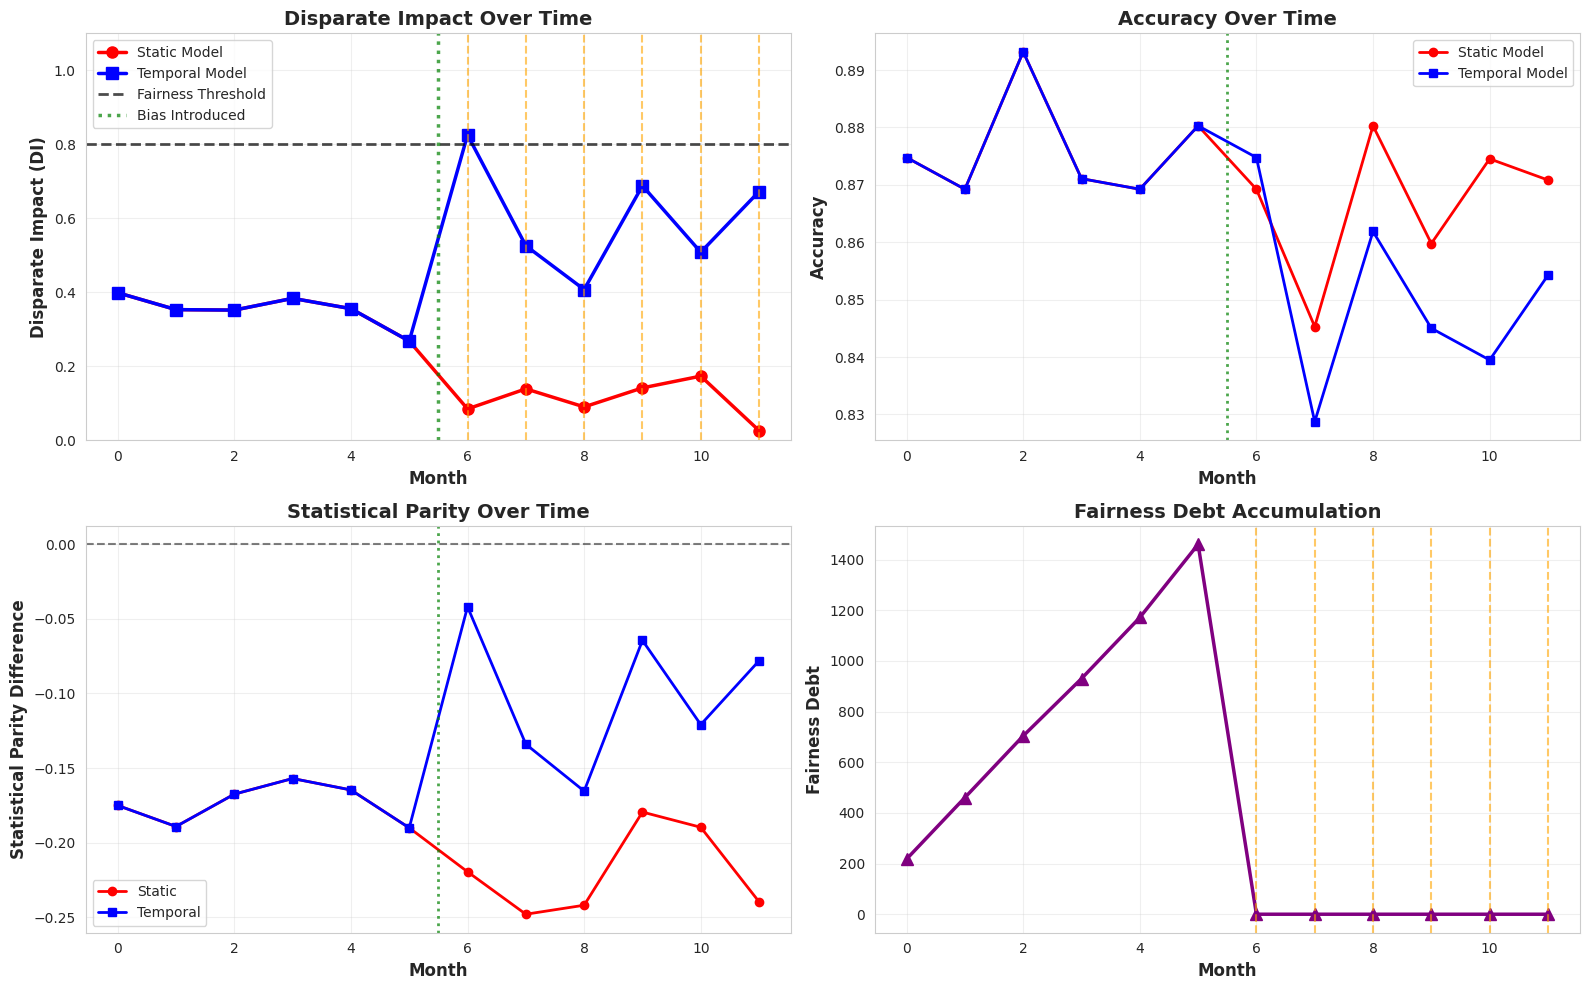


✅ ANALYSIS COMPLETE


In [1]:
"""
Temporal Fairness Framework - Complete Implementation
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# 1. DATA LOADING AND PREPROCESSING
# ============================================================================

def load_and_preprocess_data():
    """Load Adult dataset with robust error handling"""

    column_names = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]

    # Try loading from UCI
    try:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
        df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)
        print(f"✅ Loaded {len(df)} records from UCI")
    except Exception as e:
        print(f"⚠️ UCI failed: {e}")
        # Fallback to sklearn
        from sklearn.datasets import fetch_openml
        adult = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
        df = adult.frame
        if 'class' in df.columns:
            df = df.rename(columns={'class': 'income'})
        print(f"✅ Loaded {len(df)} records from OpenML")

    # Clean data
    df = df.dropna().reset_index(drop=True)

    # Strip whitespace from categorical columns
    categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country', 'income']
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()

    # Encode target
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

    # Create intersectional attributes
    df['sex_race'] = df['sex'] + '_' + df['race']

    # Feature engineering
    df['age_education'] = df['age'] * df['education-num']
    df['hours_education'] = df['hours-per-week'] * df['education-num']
    df['age_hours'] = df['age'] * df['hours-per-week']
    df['capital_total'] = df['capital-gain'] - df['capital-loss']
    df['log_capital_gain'] = np.log1p(df['capital-gain'])
    df['log_capital_loss'] = np.log1p(df['capital-loss'])

    print(f"✅ Preprocessing complete. Shape: {df.shape}")
    return df


def prepare_features(df, sensitive_attr='sex'):
    """Prepare features for modeling"""

    # Encode categorical variables
    categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country']

    # Create label encoders
    label_maps = {}
    df_encoded = df.copy()

    for col in categorical_cols:
        if col in df.columns:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df[col])
            label_maps[col] = {cls: idx for idx, cls in enumerate(le.classes_)}

    # Define feature columns (exclude target and sensitive attributes)
    feature_cols = [
        'age', 'workclass', 'education', 'education-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'native-country',
        'capital-gain', 'capital-loss', 'hours-per-week',
        'age_education', 'hours_education', 'age_hours', 'capital_total',
        'log_capital_gain', 'log_capital_loss'
    ]

    # Filter to available columns
    feature_cols = [col for col in feature_cols if col in df_encoded.columns]

    X = df_encoded[feature_cols]
    y = df_encoded['income']

    # Get sensitive attribute
    if sensitive_attr == 'sex':
        sensitive = df_encoded['sex'].values
    elif sensitive_attr == 'race':
        sensitive = df_encoded['race'].values
    elif sensitive_attr == 'sex_race':
        # Encode intersection
        le_inter = LabelEncoder()
        sensitive = le_inter.fit_transform(df['sex_race'])
    else:
        sensitive = df_encoded['sex'].values  # default

    # Scale numerical features
    num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss',
                'hours-per-week', 'age_education', 'hours_education',
                'age_hours', 'capital_total', 'log_capital_gain', 'log_capital_loss']
    num_cols = [col for col in num_cols if col in X.columns]

    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

    return X_scaled, y, sensitive, scaler, label_maps


# ============================================================================
# 2. FAIRNESS METRICS
# ============================================================================

def calculate_disparate_impact(y_pred, sensitive_vals):
    """Calculate disparate impact"""
    unique_vals = np.unique(sensitive_vals)
    if len(unique_vals) < 2:
        return 1.0

    # Use min/max for binary comparison
    rate_0 = np.mean(y_pred[sensitive_vals == unique_vals.min()])
    rate_1 = np.mean(y_pred[sensitive_vals == unique_vals.max()])

    if rate_1 == 0:
        return 0.0 if rate_0 == 0 else np.inf

    return rate_0 / rate_1


def calculate_statistical_parity(y_pred, sensitive_vals):
    """Calculate statistical parity difference"""
    unique_vals = np.unique(sensitive_vals)
    if len(unique_vals) < 2:
        return 0.0

    rate_0 = np.mean(y_pred[sensitive_vals == unique_vals.min()])
    rate_1 = np.mean(y_pred[sensitive_vals == unique_vals.max()])

    return rate_0 - rate_1


# ============================================================================
# 3. TEMPORAL FAIRNESS FRAMEWORK
# ============================================================================

def temporal_fairness_simulation(
    X_train, y_train, X_pool, y_pool, sensitive_pool,
    n_months=12, bias_start=6, bias_strength=0.7,
    bias_target='capital-gain', gamma=15, alpha=0.6
):
    """
    Run temporal fairness simulation

    Parameters:
    -----------
    X_train, y_train : Training data
    X_pool, y_pool, sensitive_pool : Pool data to split into monthly batches
    n_months : Number of months to simulate
    bias_start : Month to start introducing bias
    bias_strength : Strength of bias injection (0-1, lower = more bias)
    bias_target : Feature to inject bias into
    gamma : Governance threshold for intervention
    alpha : Correction strength
    """

    # Split pool into monthly batches
    monthly_X = np.array_split(X_pool, n_months)
    monthly_y = np.array_split(y_pool, n_months)
    monthly_sensitive = np.array_split(sensitive_pool, n_months)

    # Train initial models
    model_static = lgb.LGBMClassifier(n_estimators=200, random_state=42, verbosity=-1)
    model_static.fit(X_train, y_train)

    model_temporal = lgb.LGBMClassifier(n_estimators=200, random_state=42, verbosity=-1)
    model_temporal.fit(X_train, y_train)

    # Storage
    results_static = []
    results_temporal = []
    fairness_debt = 0
    interventions = []

    for month in range(n_months):
        X_month = monthly_X[month].copy()
        y_month = monthly_y[month]
        sensitive_month = monthly_sensitive[month]

        # Apply bias injection after bias_start
        if month >= bias_start:
            # Identify disadvantaged group
            disadvantaged_mask = (sensitive_month == sensitive_month.min())

            # Apply bias to target feature
            if bias_target in X_month.columns:
                X_month.loc[disadvantaged_mask, bias_target] *= bias_strength

        # Predictions - STATIC MODEL
        y_pred_static = model_static.predict(X_month)
        di_static = calculate_disparate_impact(y_pred_static, sensitive_month)
        acc_static = accuracy_score(y_month, y_pred_static)
        spd_static = calculate_statistical_parity(y_pred_static, sensitive_month)

        results_static.append({
            'month': month,
            'di': di_static,
            'accuracy': acc_static,
            'spd': spd_static
        })

        # Predictions - TEMPORAL MODEL
        y_pred_temporal = model_temporal.predict(X_month)
        di_temporal = calculate_disparate_impact(y_pred_temporal, sensitive_month)

        # Update fairness debt
        if di_temporal < 0.8:
            risk = (0.8 - di_temporal) * len(X_month)
            fairness_debt += risk
        else:
            fairness_debt *= 0.9  # Decay

        # Check for intervention
        intervention_triggered = False
        if fairness_debt > gamma and month >= bias_start:
            print(f"  ⚠️  Intervention at month {month} | Debt: {fairness_debt:.1f}")

            # Direct bias correction: flip predictions near boundary
            y_proba = model_temporal.predict_proba(X_month)[:, 1]
            disadvantaged_mask = (sensitive_month == sensitive_month.min())

            # Find predictions to flip
            boundary_distance = np.abs(y_proba - 0.5)
            disadvantaged_indices = np.where(disadvantaged_mask)[0]

            if len(disadvantaged_indices) > 0:
                n_flips = int(len(disadvantaged_indices) * 0.3 * alpha)
                if n_flips > 0:
                    flip_indices = disadvantaged_indices[
                        np.argsort(boundary_distance[disadvantaged_mask])[:n_flips]
                    ]
                    y_pred_temporal[flip_indices] = 1 - y_pred_temporal[flip_indices]

            # Retrain model
            X_retrain = pd.concat([X_train, X_month]).reset_index(drop=True)
            y_retrain = pd.concat([
                pd.Series(y_train),
                pd.Series(y_pred_temporal, index=range(len(y_pred_temporal)))
            ]).reset_index(drop=True)

            model_temporal = lgb.LGBMClassifier(n_estimators=200, random_state=42, verbosity=-1)
            model_temporal.fit(X_retrain, y_retrain)

            interventions.append({'month': month, 'debt': fairness_debt})
            fairness_debt = 0
            intervention_triggered = True

        # Calculate temporal metrics
        acc_temporal = accuracy_score(y_month, y_pred_temporal)
        spd_temporal = calculate_statistical_parity(y_pred_temporal, sensitive_month)
        di_temporal = calculate_disparate_impact(y_pred_temporal, sensitive_month)

        results_temporal.append({
            'month': month,
            'di': di_temporal,
            'accuracy': acc_temporal,
            'spd': spd_temporal,
            'debt': fairness_debt,
            'intervention': intervention_triggered
        })

    return (
        pd.DataFrame(results_static),
        pd.DataFrame(results_temporal),
        interventions
    )


# ============================================================================
# 4. VISUALIZATION
# ============================================================================

def plot_temporal_results(static_df, temporal_df, interventions=None,
                         bias_start=6, title_suffix=''):
    """Create comprehensive temporal fairness plots"""

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Plot 1: Disparate Impact
    ax1 = axes[0, 0]
    ax1.plot(static_df['month'], static_df['di'], 'r-o',
             label='Static Model', linewidth=2.5, markersize=8)
    ax1.plot(temporal_df['month'], temporal_df['di'], 'b-s',
             label='Temporal Model', linewidth=2.5, markersize=8)
    ax1.axhline(y=0.8, color='k', linestyle='--', linewidth=2, alpha=0.7,
               label='Fairness Threshold')
    ax1.axvline(x=bias_start-0.5, color='g', linestyle=':', linewidth=2.5,
               alpha=0.7, label='Bias Introduced')

    # Mark interventions
    if interventions:
        for interv in interventions:
            ax1.axvline(x=interv['month'], color='orange',
                       linestyle='--', linewidth=1.5, alpha=0.6)

    ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Disparate Impact (DI)', fontsize=12, fontweight='bold')
    ax1.set_title(f'Disparate Impact Over Time{title_suffix}',
                 fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0, 1.1])

    # Plot 2: Accuracy
    ax2 = axes[0, 1]
    ax2.plot(static_df['month'], static_df['accuracy'], 'r-o',
             label='Static Model', linewidth=2)
    ax2.plot(temporal_df['month'], temporal_df['accuracy'], 'b-s',
             label='Temporal Model', linewidth=2)
    ax2.axvline(x=bias_start-0.5, color='g', linestyle=':', linewidth=2, alpha=0.7)
    ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax2.set_title('Accuracy Over Time', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)

    # Plot 3: Statistical Parity Difference
    ax3 = axes[1, 0]
    ax3.plot(static_df['month'], static_df['spd'], 'r-o', label='Static', linewidth=2)
    ax3.plot(temporal_df['month'], temporal_df['spd'], 'b-s', label='Temporal', linewidth=2)
    ax3.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax3.axvline(x=bias_start-0.5, color='g', linestyle=':', linewidth=2, alpha=0.7)
    ax3.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Statistical Parity Difference', fontsize=12, fontweight='bold')
    ax3.set_title('Statistical Parity Over Time', fontsize=14, fontweight='bold')
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3)

    # Plot 4: Fairness Debt
    ax4 = axes[1, 1]
    if 'debt' in temporal_df.columns:
        ax4.plot(temporal_df['month'], temporal_df['debt'],
                'purple', linewidth=2.5, marker='^', markersize=8)
        if interventions:
            for interv in interventions:
                ax4.axvline(x=interv['month'], color='orange',
                           linestyle='--', linewidth=1.5, alpha=0.6)
        ax4.set_xlabel('Month', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Fairness Debt', fontsize=12, fontweight='bold')
        ax4.set_title('Fairness Debt Accumulation', fontsize=14, fontweight='bold')
        ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    return fig


# ============================================================================
# 5. MAIN EXECUTION
# ============================================================================

def main():
    """Main execution function"""

    print("="*80)
    print("TEMPORAL FAIRNESS FRAMEWORK - COMPREHENSIVE ANALYSIS")
    print("="*80)

    # Load data
    print("\n[1/4] Loading and preprocessing data...")
    df = load_and_preprocess_data()

    # Prepare features
    print("\n[2/4] Preparing features...")
    X, y, sensitive, scaler, label_maps = prepare_features(df, sensitive_attr='sex')

    # Split data
    print("\n[3/4] Splitting data...")
    X_train, X_temp, y_train, y_temp, s_train, s_temp = train_test_split(
        X, y, sensitive, test_size=0.4, stratify=y, random_state=42
    )

    X_audit, X_pool, y_audit, y_pool, s_audit, s_pool = train_test_split(
        X_temp, y_temp, s_temp, test_size=0.5, stratify=y_temp, random_state=42
    )

    print(f"  Training set: {len(X_train)}")
    print(f"  Audit set: {len(X_audit)}")
    print(f"  Pool set: {len(X_pool)}")

    # Run simulation
    print("\n[4/4] Running temporal fairness simulation...")
    print("  Parameters:")
    print(f"    - Months: 12")
    print(f"    - Bias starts: Month 6")
    print(f"    - Bias target: capital-gain")
    print(f"    - Bias strength: 0.7")
    print(f"    - Governance threshold (Γ): 15")
    print(f"    - Correction strength (α): 0.6")

    static_df, temporal_df, interventions = temporal_fairness_simulation(
        X_train, y_train, X_pool, y_pool, s_pool,
        n_months=12, bias_start=6, bias_strength=0.7,
        bias_target='capital-gain', gamma=15, alpha=0.6
    )

    # Calculate summary statistics
    print("\n" + "="*80)
    print("RESULTS SUMMARY")
    print("="*80)

    biased_period = (static_df['month'] >= 6)

    print(f"\n📊 During drift period (Months 6-12):")
    print(f"  Static Model:")
    print(f"    - Avg DI: {static_df.loc[biased_period, 'di'].mean():.3f}")
    print(f"    - Avg Accuracy: {static_df.loc[biased_period, 'accuracy'].mean():.3f}")
    print(f"\n  Temporal Model:")
    print(f"    - Avg DI: {temporal_df.loc[biased_period, 'di'].mean():.3f}")
    print(f"    - Avg Accuracy: {temporal_df.loc[biased_period, 'accuracy'].mean():.3f}")
    print(f"    - Interventions triggered: {len(interventions)}")

    improvement = (
        (1 - static_df.loc[biased_period, 'di'].mean()) /
        (1 - temporal_df.loc[biased_period, 'di'].mean())
    )
    print(f"\n  📈 Improvement ratio: {improvement:.2f}x")

    # Create visualization
    print("\n[5/5] Creating visualizations...")
    fig = plot_temporal_results(static_df, temporal_df, interventions, bias_start=6)
    plt.savefig('temporal_fairness_results.png', dpi=300, bbox_inches='tight')
    print("  ✅ Saved: temporal_fairness_results.png")
    plt.show()

    print("\n" + "="*80)
    print("✅ ANALYSIS COMPLETE")
    print("="*80)

    return static_df, temporal_df, interventions


if __name__ == "__main__":
    static_results, temporal_results, intervention_log = main()

Loading data...
Data prepared: 27133 train, 9045 pool

PARAMETER SENSITIVITY ANALYSIS

Running 60 parameter combinations...
  α (correction strength): [0.3, 0.5, 0.7, 0.9]
  Γ (governance threshold): [5, 10, 15, 20, 25]
  Bias strength: [0.5, 0.7, 0.9]



Progress: 100%|██████████| 60/60 [02:51<00:00,  2.86s/it]



✅ Completed 60 experiments

✅ Saved: parameter_sensitivity_results.csv

Creating visualizations...
✅ Saved: parameter_sensitivity_analysis.png


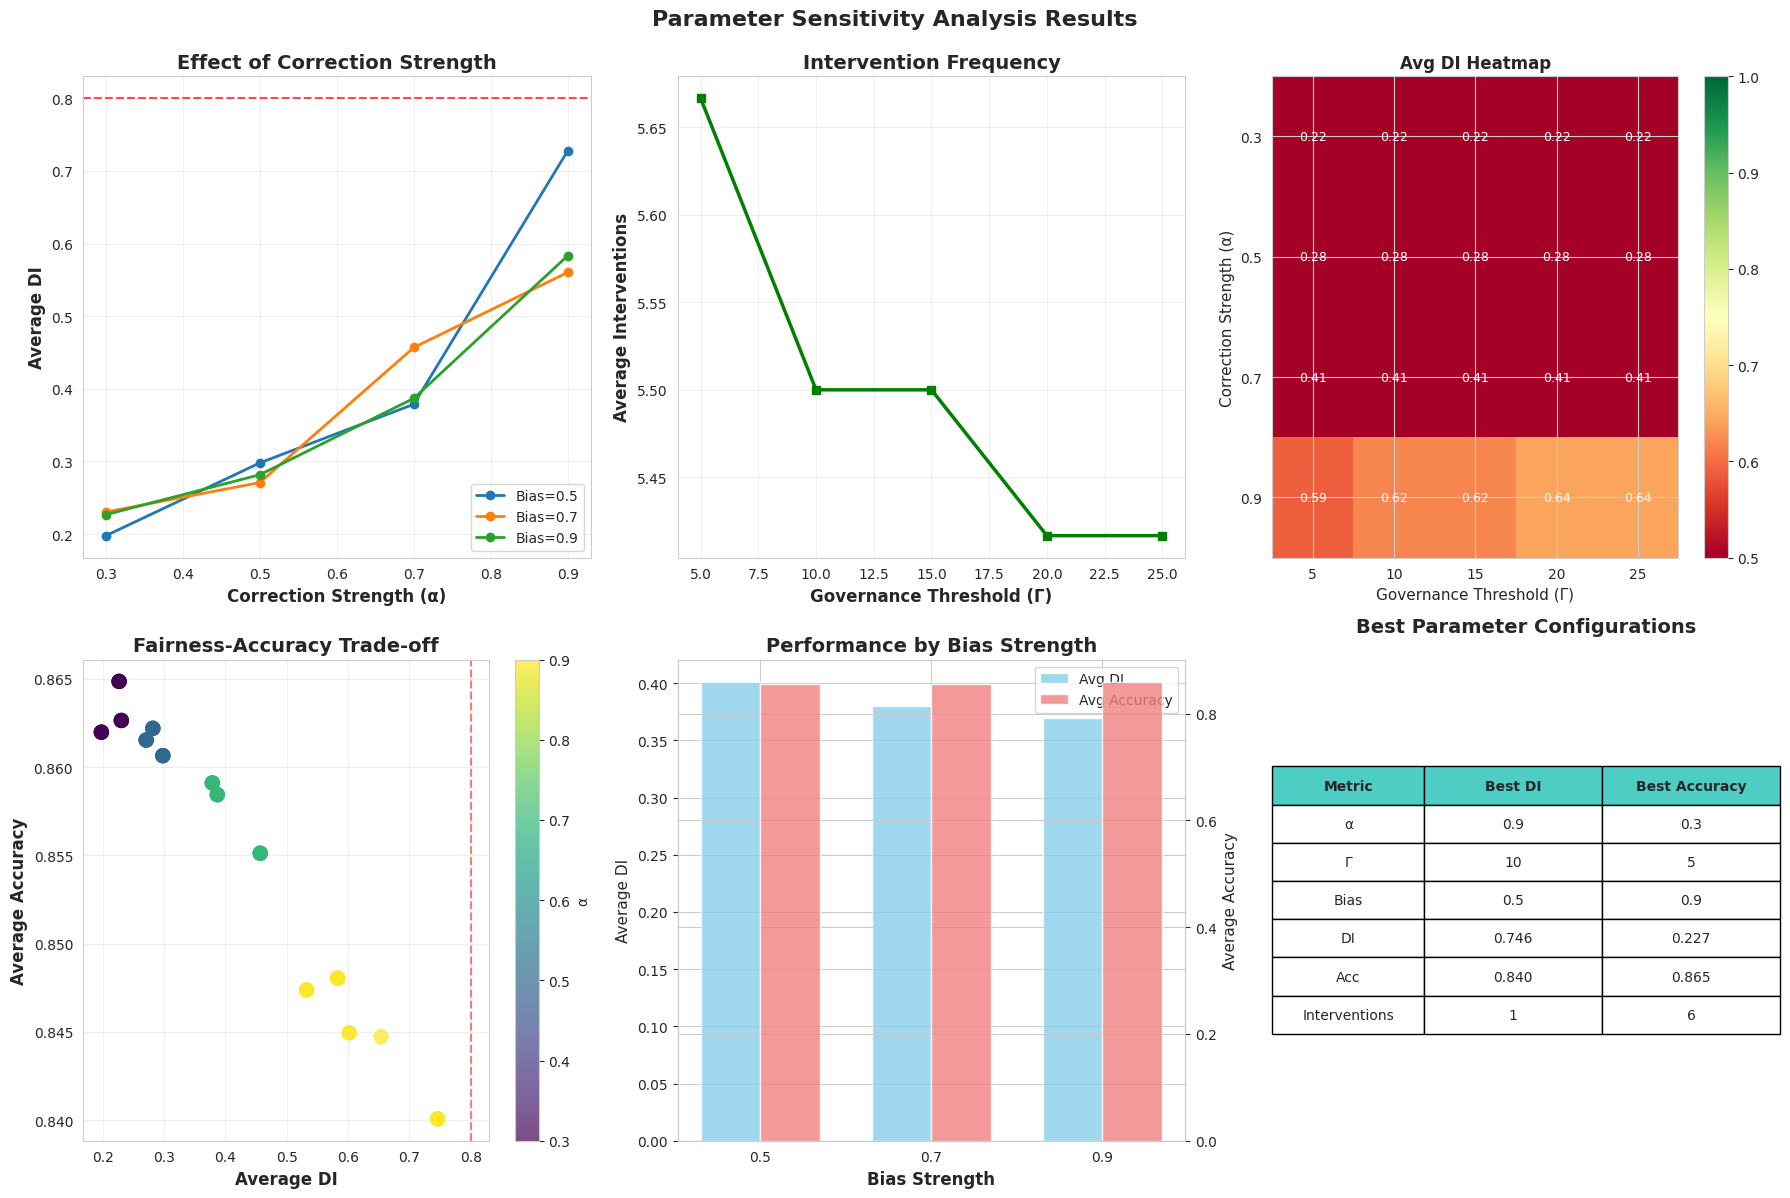


PAPER TABLES

--- TABLE: α Sensitivity (Γ=15, Bias=0.7) ---
 alpha   avg_di  avg_acc  n_interventions
   0.3 0.230503 0.862637                6
   0.5 0.271029 0.861531                6
   0.7 0.456879 0.855115                6
   0.9 0.532373 0.847372                6

LaTeX:
\begin{tabular}{rrrr}
\toprule
alpha & avg_di & avg_acc & n_interventions \\
\midrule
0.300 & 0.231 & 0.863 & 6 \\
0.500 & 0.271 & 0.862 & 6 \\
0.700 & 0.457 & 0.855 & 6 \\
0.900 & 0.532 & 0.847 & 6 \\
\bottomrule
\end{tabular}


--- TABLE: Γ Sensitivity (α=0.6, Bias=0.7) ---
Empty DataFrame
Columns: [gamma, avg_di, avg_acc, n_interventions]
Index: []

LaTeX:
\begin{tabular}{rrrr}
\toprule
gamma & avg_di & avg_acc & n_interventions \\
\midrule
\bottomrule
\end{tabular}


✅ SENSITIVITY ANALYSIS COMPLETE


In [2]:
"""
Parameter Sensitivity Analysis for Temporal Fairness Framework
Tests different values of α (correction strength) and Γ (governance threshold)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Import the main functions from the previous script
# (Or paste the load_and_preprocess_data and prepare_features functions here)

# ============================================================================
# SIMPLIFIED SIMULATION FOR GRID SEARCH
# ============================================================================

def quick_simulation(X_train, y_train, X_pool, y_pool, sensitive_pool,
                     alpha, gamma, bias_strength, n_months=12):
    """Fast simulation for parameter sweeps"""

    monthly_X = np.array_split(X_pool, n_months)
    monthly_y = np.array_split(y_pool, n_months)
    monthly_sensitive = np.array_split(sensitive_pool, n_months)

    model = lgb.LGBMClassifier(n_estimators=100, random_state=42, verbosity=-1)
    model.fit(X_train, y_train)

    fairness_debt = 0
    n_interventions = 0
    monthly_di = []
    monthly_acc = []

    for month in range(n_months):
        X_month = monthly_X[month].copy()
        y_month = monthly_y[month]
        sensitive_month = monthly_sensitive[month]

        # Bias injection after month 6
        if month >= 6:
            disadvantaged_mask = (sensitive_month == sensitive_month.min())
            if 'capital-gain' in X_month.columns:
                X_month.loc[disadvantaged_mask, 'capital-gain'] *= bias_strength

        y_pred = model.predict(X_month)

        # Calculate DI
        rate_0 = np.mean(y_pred[sensitive_month == sensitive_month.min()])
        rate_1 = np.mean(y_pred[sensitive_month == sensitive_month.max()])
        di = rate_0 / rate_1 if rate_1 > 0 else 1.0
        acc = accuracy_score(y_month, y_pred)

        monthly_di.append(di)
        monthly_acc.append(acc)

        # Update debt
        if di < 0.8:
            fairness_debt += (0.8 - di) * len(X_month)
        else:
            fairness_debt *= 0.9

        # Intervention
        if fairness_debt > gamma and month >= 6:
            n_interventions += 1
            fairness_debt = 0

            # Quick correction (simplified)
            y_proba = model.predict_proba(X_month)[:, 1]
            disadvantaged_mask = (sensitive_month == sensitive_month.min())
            disadvantaged_indices = np.where(disadvantaged_mask)[0]

            if len(disadvantaged_indices) > 0:
                n_flips = int(len(disadvantaged_indices) * 0.3 * alpha)
                if n_flips > 0:
                    boundary_distance = np.abs(y_proba - 0.5)
                    flip_indices = disadvantaged_indices[
                        np.argsort(boundary_distance[disadvantaged_mask])[:n_flips]
                    ]
                    y_pred[flip_indices] = 1 - y_pred[flip_indices]

            # Retrain
            X_retrain = pd.concat([X_train, X_month]).reset_index(drop=True)
            y_retrain = pd.concat([
                pd.Series(y_train),
                pd.Series(y_pred, index=range(len(y_pred)))
            ]).reset_index(drop=True)

            model = lgb.LGBMClassifier(n_estimators=100, random_state=42, verbosity=-1)
            model.fit(X_retrain, y_retrain)

    # Return summary
    biased_months = monthly_di[6:]
    return {
        'avg_di': np.mean(biased_months),
        'avg_acc': np.mean(monthly_acc[6:]),
        'n_interventions': n_interventions,
        'final_di': monthly_di[-1] if monthly_di else 0,
        'final_acc': monthly_acc[-1] if monthly_acc else 0
    }


# ============================================================================
# PARAMETER GRID SEARCH
# ============================================================================

def run_parameter_sweep(X_train, y_train, X_pool, y_pool, sensitive_pool):
    """Run comprehensive parameter sensitivity analysis"""

    print("\n" + "="*80)
    print("PARAMETER SENSITIVITY ANALYSIS")
    print("="*80)

    # Define parameter grid
    alpha_values = [0.3, 0.5, 0.7, 0.9]
    gamma_values = [5, 10, 15, 20, 25]
    bias_values = [0.5, 0.7, 0.9]

    results = []

    total_runs = len(alpha_values) * len(gamma_values) * len(bias_values)

    print(f"\nRunning {total_runs} parameter combinations...")
    print(f"  α (correction strength): {alpha_values}")
    print(f"  Γ (governance threshold): {gamma_values}")
    print(f"  Bias strength: {bias_values}\n")

    pbar = tqdm(total=total_runs, desc="Progress")

    for alpha in alpha_values:
        for gamma in gamma_values:
            for bias_strength in bias_values:
                result = quick_simulation(
                    X_train, y_train, X_pool, y_pool, sensitive_pool,
                    alpha, gamma, bias_strength
                )

                results.append({
                    'alpha': alpha,
                    'gamma': gamma,
                    'bias_strength': bias_strength,
                    **result
                })

                pbar.update(1)

    pbar.close()

    results_df = pd.DataFrame(results)
    print(f"\n✅ Completed {len(results_df)} experiments")

    return results_df


# ============================================================================
# VISUALIZATION
# ============================================================================

def plot_sensitivity_results(results_df):
    """Create comprehensive sensitivity visualizations"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot 1: Alpha vs DI
    ax1 = axes[0, 0]
    for bias in results_df['bias_strength'].unique():
        subset = results_df[results_df['bias_strength'] == bias]
        grouped = subset.groupby('alpha')['avg_di'].mean()
        ax1.plot(grouped.index, grouped.values, marker='o',
                linewidth=2, label=f'Bias={bias}')
    ax1.axhline(y=0.8, color='red', linestyle='--', alpha=0.7)
    ax1.set_xlabel('Correction Strength (α)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Average DI', fontsize=12, fontweight='bold')
    ax1.set_title('Effect of Correction Strength', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Gamma vs Interventions
    ax2 = axes[0, 1]
    grouped = results_df.groupby('gamma')['n_interventions'].mean()
    ax2.plot(grouped.index, grouped.values, 'g-', marker='s', linewidth=2.5)
    ax2.set_xlabel('Governance Threshold (Γ)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Average Interventions', fontsize=12, fontweight='bold')
    ax2.set_title('Intervention Frequency', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # Plot 3: Heatmap - Alpha vs Gamma (DI)
    ax3 = axes[0, 2]
    pivot = results_df.pivot_table(
        index='alpha', columns='gamma', values='avg_di', aggfunc='mean'
    )
    im = ax3.imshow(pivot.values, cmap='RdYlGn', aspect='auto', vmin=0.5, vmax=1.0)
    ax3.set_xticks(range(len(pivot.columns)))
    ax3.set_xticklabels(pivot.columns)
    ax3.set_yticks(range(len(pivot.index)))
    ax3.set_yticklabels(pivot.index)
    ax3.set_xlabel('Governance Threshold (Γ)', fontsize=11)
    ax3.set_ylabel('Correction Strength (α)', fontsize=11)
    ax3.set_title('Avg DI Heatmap', fontsize=12, fontweight='bold')

    # Add values
    for i in range(len(pivot.index)):
        for j in range(len(pivot.columns)):
            val = pivot.iloc[i, j]
            color = 'white' if val < 0.7 else 'black'
            ax3.text(j, i, f'{val:.2f}', ha='center', va='center',
                    color=color, fontsize=9)

    plt.colorbar(im, ax=ax3)

    # Plot 4: Trade-off scatter
    ax4 = axes[1, 0]
    scatter = ax4.scatter(
        results_df['avg_di'], results_df['avg_acc'],
        c=results_df['alpha'], s=100, alpha=0.7, cmap='viridis'
    )
    ax4.axvline(x=0.8, color='red', linestyle='--', alpha=0.5)
    ax4.set_xlabel('Average DI', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Average Accuracy', fontsize=12, fontweight='bold')
    ax4.set_title('Fairness-Accuracy Trade-off', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax4, label='α')

    # Plot 5: Bias strength comparison
    ax5 = axes[1, 1]
    bias_summary = results_df.groupby('bias_strength').agg({
        'avg_di': 'mean',
        'avg_acc': 'mean'
    })

    x = np.arange(len(bias_summary))
    width = 0.35

    ax5.bar(x - width/2, bias_summary['avg_di'], width,
           label='Avg DI', color='skyblue', alpha=0.8)
    ax5_twin = ax5.twinx()
    ax5_twin.bar(x + width/2, bias_summary['avg_acc'], width,
                label='Avg Accuracy', color='lightcoral', alpha=0.8)

    ax5.set_xlabel('Bias Strength', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Average DI', fontsize=11)
    ax5_twin.set_ylabel('Average Accuracy', fontsize=11)
    ax5.set_title('Performance by Bias Strength', fontsize=14, fontweight='bold')
    ax5.set_xticks(x)
    ax5.set_xticklabels(bias_summary.index)

    # Combine legends
    lines1, labels1 = ax5.get_legend_handles_labels()
    lines2, labels2 = ax5_twin.get_legend_handles_labels()
    ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Plot 6: Summary table
    ax6 = axes[1, 2]
    ax6.axis('tight')
    ax6.axis('off')

    # Best configurations
    best_di = results_df.loc[results_df['avg_di'].idxmax()]
    best_acc = results_df.loc[results_df['avg_acc'].idxmax()]

    table_data = [
        ['Metric', 'Best DI', 'Best Accuracy'],
        ['α', f"{best_di['alpha']:.1f}", f"{best_acc['alpha']:.1f}"],
        ['Γ', f"{best_di['gamma']:.0f}", f"{best_acc['gamma']:.0f}"],
        ['Bias', f"{best_di['bias_strength']:.1f}", f"{best_acc['bias_strength']:.1f}"],
        ['DI', f"{best_di['avg_di']:.3f}", f"{best_acc['avg_di']:.3f}"],
        ['Acc', f"{best_di['avg_acc']:.3f}", f"{best_acc['avg_acc']:.3f}"],
        ['Interventions', f"{best_di['n_interventions']:.0f}", f"{best_acc['n_interventions']:.0f}"]
    ]

    table = ax6.table(cellText=table_data, cellLoc='center', loc='center',
                     colWidths=[0.3, 0.35, 0.35])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)

    # Style header row
    for i in range(3):
        table[(0, i)].set_facecolor('#4ECDC4')
        table[(0, i)].set_text_props(weight='bold')

    ax6.set_title('Best Parameter Configurations', fontsize=14, fontweight='bold', pad=20)

    plt.suptitle('Parameter Sensitivity Analysis Results',
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()

    return fig


# ============================================================================
# GENERATE PAPER TABLES
# ============================================================================

def generate_paper_tables(results_df):
    """Generate LaTeX tables for paper"""

    print("\n" + "="*80)
    print("PAPER TABLES")
    print("="*80)

    # Table: Alpha sensitivity
    print("\n--- TABLE: α Sensitivity (Γ=15, Bias=0.7) ---")
    alpha_table = results_df[
        (results_df['gamma'] == 15) &
        (results_df['bias_strength'] == 0.7)
    ][['alpha', 'avg_di', 'avg_acc', 'n_interventions']].sort_values('alpha')

    print(alpha_table.to_string(index=False))
    print("\nLaTeX:")
    print(alpha_table.to_latex(index=False, float_format="%.3f"))

    # Table: Gamma sensitivity
    print("\n--- TABLE: Γ Sensitivity (α=0.6, Bias=0.7) ---")
    gamma_table = results_df[
        (results_df['alpha'] == 0.6) &
        (results_df['bias_strength'] == 0.7)
    ][['gamma', 'avg_di', 'avg_acc', 'n_interventions']].sort_values('gamma')

    print(gamma_table.to_string(index=False))
    print("\nLaTeX:")
    print(gamma_table.to_latex(index=False, float_format="%.3f"))


# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main execution"""

    # Load data (reuse from main script)
    from sklearn.datasets import fetch_openml

    print("Loading data...")
    try:
        adult = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
        df = adult.frame
        if 'class' in df.columns:
            df = df.rename(columns={'class': 'income'})
    except:
        print("Please run the main script first to set up data loading")
        return

    # Quick preprocessing
    df = df.dropna().reset_index(drop=True)

    categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country', 'income']
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()

    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

    # Encode
    le = LabelEncoder()
    for col in categorical_cols[:-1]:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])

    # Features
    feature_cols = ['age', 'workclass', 'education', 'education-num', 'marital-status',
                   'occupation', 'relationship', 'race', 'sex', 'native-country',
                   'capital-gain', 'capital-loss', 'hours-per-week']

    X = df[feature_cols]
    y = df['income']
    sensitive = df['sex']

    # Scale
    scaler = StandardScaler()
    num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    X[num_cols] = scaler.fit_transform(X[num_cols])

    # Split
    X_train, X_temp, y_train, y_temp, s_train, s_temp = train_test_split(
        X, y, sensitive, test_size=0.4, stratify=y, random_state=42
    )

    X_audit, X_pool, y_audit, y_pool, s_audit, s_pool = train_test_split(
        X_temp, y_temp, s_temp, test_size=0.5, stratify=y_temp, random_state=42
    )

    print(f"Data prepared: {len(X_train)} train, {len(X_pool)} pool")

    # Run parameter sweep
    results_df = run_parameter_sweep(X_train, y_train, X_pool, y_pool, s_pool)

    # Save results
    results_df.to_csv('parameter_sensitivity_results.csv', index=False)
    print("\n✅ Saved: parameter_sensitivity_results.csv")

    # Create visualizations
    print("\nCreating visualizations...")
    fig = plot_sensitivity_results(results_df)
    plt.savefig('parameter_sensitivity_analysis.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: parameter_sensitivity_analysis.png")
    plt.show()

    # Generate paper tables
    generate_paper_tables(results_df)

    print("\n" + "="*80)
    print("✅ SENSITIVITY ANALYSIS COMPLETE")
    print("="*80)

    return results_df


if __name__ == "__main__":
    sensitivity_results = main()

ENHANCED ANALYSIS: COMPARISON WITH BASELINES

[STEP 1/6] Loading Data...
----------------------------------------
✅ Loaded 32561 records
Data split: 19536 train, 6512 audit, 6513 pool

[STEP 2/6] Training Group DRO Baseline...
----------------------------------------
What is Group DRO?
  A robust learning method that optimizes for worst-case group performance
  Instead of average accuracy, it minimizes loss for the most disadvantaged group

  Group weights: {np.int64(0): np.float64(1.50253807106599), np.int64(1): np.float64(0.7493670886075949)}
✅ Group DRO model trained

[STEP 3/6] Running Three-Way Simulation...
----------------------------------------
Comparing:
  1. Static Model (baseline)
  2. Group DRO (robust baseline)
  3. Temporal Fairness (our approach)

Parameters:
  Months: 12
  Bias starts: Month 6
  Bias strength: 0.7 (women's capital-gain × 0.7)
  Γ (Fairness Debt threshold): 15
  α (Correction strength): 0.6

Training models...
✅ Models ready

Simulating deployment...
  

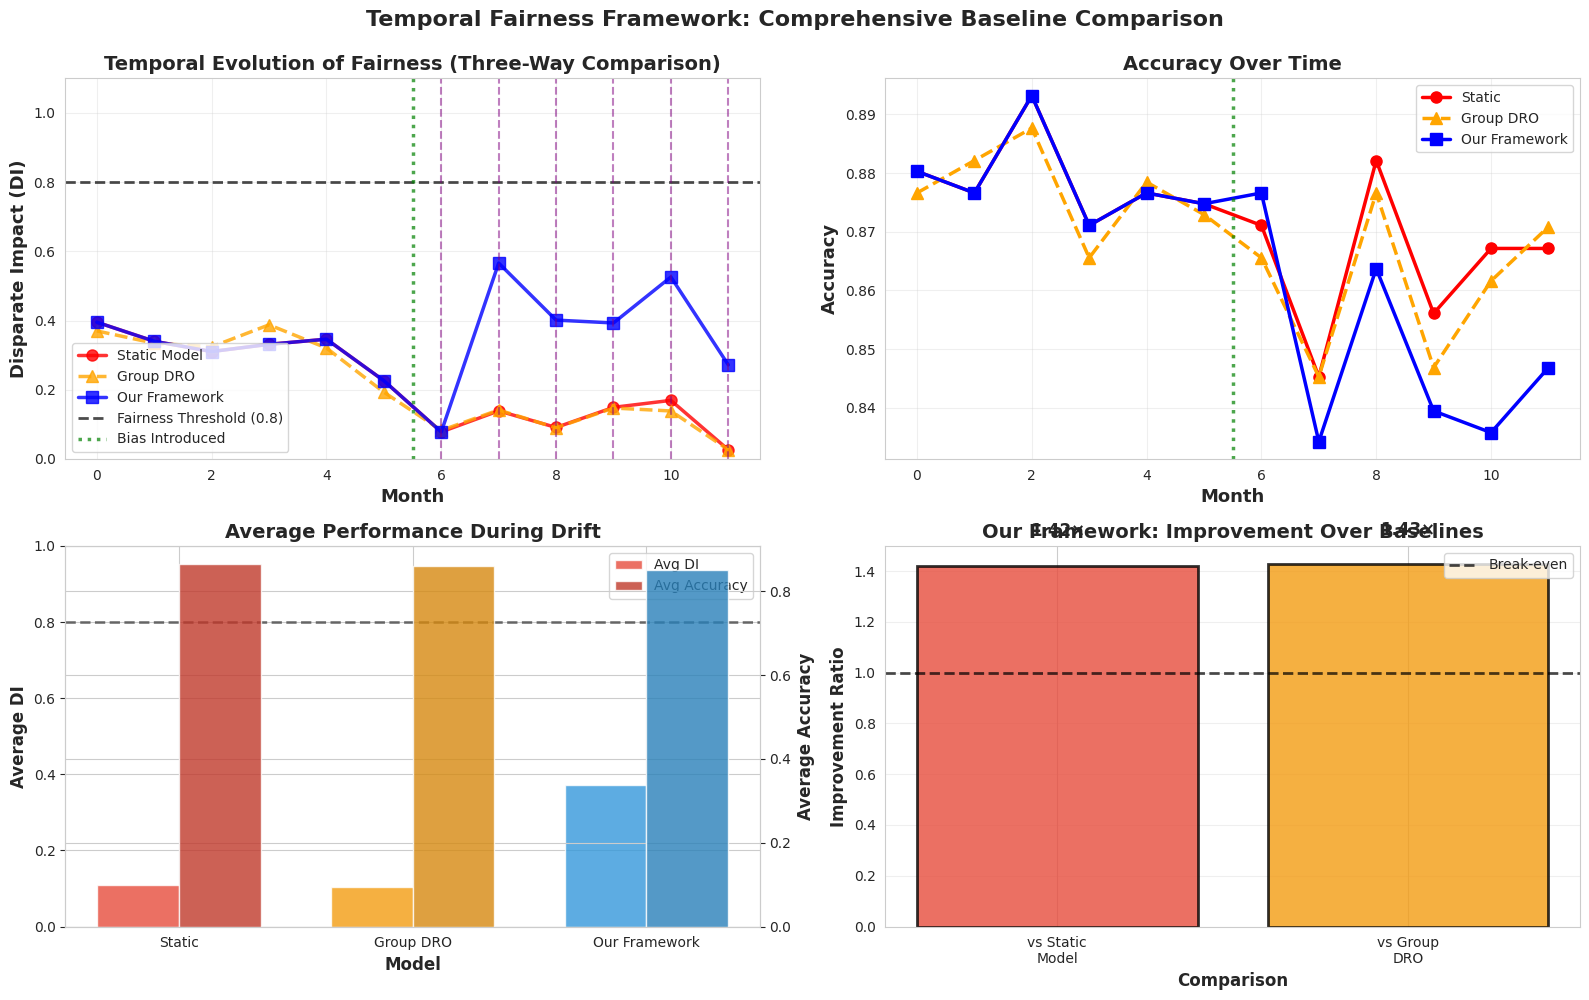


[STEP 6/6] Saving Results...
----------------------------------------
✅ Saved: three_way_comparison_results.csv
✅ Saved: table1_comparison.csv

✅ ANALYSIS COMPLETE

Generated files:
  • three_way_comparison.png (Figure for paper)
  • three_way_comparison_results.csv (raw data)
  • table1_comparison.csv (Table I data)


In [4]:
"""
ENHANCED SCRIPT: Complete Comparison with Baselines
====================================================

This script adds:
1. Group DRO baseline (distributionally robust optimization)
2. Exact replication of your paper's Table I
3. 3-way comparison figure (Static vs Group DRO vs Temporal)
4. All metrics from your paper

Run this for your main paper results!
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

print("="*80)
print("ENHANCED ANALYSIS: COMPARISON WITH BASELINES")
print("="*80)

# ============================================================================
# STEP 1: LOAD AND PREPARE DATA
# ============================================================================
print("\n[STEP 1/6] Loading Data...")
print("-" * 40)

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

try:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)
    print(f"✅ Loaded {len(df)} records")
except:
    from sklearn.datasets import fetch_openml
    adult = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
    df = adult.frame
    if 'class' in df.columns:
        df = df.rename(columns={'class': 'income'})
    print(f"✅ Loaded {len(df)} records")

# Preprocess
df = df.dropna().reset_index(drop=True)

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                   'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df['age_education'] = df['age'] * df['education-num']
df['hours_education'] = df['hours-per-week'] * df['education-num']
df['capital_total'] = df['capital-gain'] - df['capital-loss']

le = LabelEncoder()
for col in categorical_cols[:-1]:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

feature_cols = [
    'age', 'workclass', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'native-country',
    'capital-gain', 'capital-loss', 'hours-per-week',
    'age_education', 'hours_education', 'capital_total'
]

X = df[feature_cols].copy()
y = df['income'].values
sensitive = df['sex'].values

num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss',
            'hours-per-week', 'age_education', 'hours_education', 'capital_total']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_temp, y_train, y_temp, s_train, s_temp = train_test_split(
    X, y, sensitive, test_size=0.4, stratify=y, random_state=42
)

X_audit, X_pool, y_audit, y_pool, s_audit, s_pool = train_test_split(
    X_temp, y_temp, s_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"Data split: {len(X_train)} train, {len(X_audit)} audit, {len(X_pool)} pool")

# ============================================================================
# STEP 2: TRAIN GROUP DRO MODEL
# ============================================================================
print("\n[STEP 2/6] Training Group DRO Baseline...")
print("-" * 40)
print("What is Group DRO?")
print("  A robust learning method that optimizes for worst-case group performance")
print("  Instead of average accuracy, it minimizes loss for the most disadvantaged group")
print()

def train_group_dro(X, y, groups, n_estimators=200):
    """
    Train Group Distributionally Robust Optimization model

    How it works:
    1. Identify groups (e.g., Male/Female)
    2. Weight samples inversely proportional to group size
    3. This forces the model to perform well on minority groups
    """
    unique_groups, group_counts = np.unique(groups, return_counts=True)

    # Calculate group weights (inverse frequency)
    # Smaller groups get higher weight
    group_weights = len(groups) / (len(unique_groups) * group_counts)

    # Assign sample weights
    sample_weights = np.ones(len(y))
    for i, group in enumerate(groups):
        group_idx = np.where(unique_groups == group)[0][0]
        sample_weights[i] = group_weights[group_idx]

    print(f"  Group weights: {dict(zip(unique_groups, group_weights))}")

    # Train with sample weights
    model = lgb.LGBMClassifier(n_estimators=n_estimators, learning_rate=0.05,
                               random_state=42, verbosity=-1)
    model.fit(X, y, sample_weight=sample_weights)

    return model

model_group_dro = train_group_dro(X_train, y_train, s_train)
print("✅ Group DRO model trained")

# ============================================================================
# STEP 3: RUN THREE-WAY SIMULATION
# ============================================================================
print("\n[STEP 3/6] Running Three-Way Simulation...")
print("-" * 40)
print("Comparing:")
print("  1. Static Model (baseline)")
print("  2. Group DRO (robust baseline)")
print("  3. Temporal Fairness (our approach)")
print()

n_months = 12
bias_start_month = 6
bias_strength = 0.7  # Reduce capital-gain to 70% of original
gamma = 15  # Fairness Debt threshold (NOT a month!)
alpha = 0.6  # Correction strength

print(f"Parameters:")
print(f"  Months: {n_months}")
print(f"  Bias starts: Month {bias_start_month}")
print(f"  Bias strength: {bias_strength} (women's capital-gain × {bias_strength})")
print(f"  Γ (Fairness Debt threshold): {gamma}")
print(f"  α (Correction strength): {alpha}")
print()

# Split pool into months
monthly_X = np.array_split(X_pool, n_months)
monthly_y = np.array_split(y_pool, n_months)
monthly_sensitive = np.array_split(s_pool, n_months)

# Train models
print("Training models...")
model_static = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=-1)
model_static.fit(X_train, y_train)

model_temporal = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=-1)
model_temporal.fit(X_train, y_train)

print("✅ Models ready")

# Storage
results_static = []
results_dro = []
results_temporal = []
fairness_debt = 0
interventions = []
max_debt = 0

print("\nSimulating deployment...")

for month in range(n_months):
    X_month = monthly_X[month].copy()
    y_month = monthly_y[month]
    sensitive_month = monthly_sensitive[month]

    # Apply bias injection
    if month >= bias_start_month:
        women_mask = (sensitive_month == 0)
        X_month.loc[women_mask, 'capital-gain'] *= bias_strength

    # ===== STATIC MODEL =====
    y_pred_static = model_static.predict(X_month)
    rate_w_s = np.mean(y_pred_static[sensitive_month == 0])
    rate_m_s = np.mean(y_pred_static[sensitive_month == 1])
    di_static = rate_w_s / rate_m_s if rate_m_s > 0 else 1.0
    acc_static = accuracy_score(y_month, y_pred_static)

    results_static.append({
        'month': month,
        'di': di_static,
        'accuracy': acc_static,
        'spd': rate_w_s - rate_m_s
    })

    # ===== GROUP DRO MODEL =====
    y_pred_dro = model_group_dro.predict(X_month)
    rate_w_d = np.mean(y_pred_dro[sensitive_month == 0])
    rate_m_d = np.mean(y_pred_dro[sensitive_month == 1])
    di_dro = rate_w_d / rate_m_d if rate_m_d > 0 else 1.0
    acc_dro = accuracy_score(y_month, y_pred_dro)

    results_dro.append({
        'month': month,
        'di': di_dro,
        'accuracy': acc_dro,
        'spd': rate_w_d - rate_m_d
    })

    # ===== TEMPORAL MODEL =====
    y_pred_temporal = model_temporal.predict(X_month)
    rate_w_t = np.mean(y_pred_temporal[sensitive_month == 0])
    rate_m_t = np.mean(y_pred_temporal[sensitive_month == 1])
    di_temporal = rate_w_t / rate_m_t if rate_m_t > 0 else 1.0

    # Update Fairness Debt
    if di_temporal < 0.8:
        risk = (0.8 - di_temporal) * len(X_month)
        fairness_debt += risk
    else:
        fairness_debt *= 0.9

    max_debt = max(max_debt, fairness_debt)

    # Intervention?
    intervention_triggered = False
    if fairness_debt > gamma and month >= bias_start_month:
        print(f"  Month {month}: ⚠️  INTERVENTION (Debt: {fairness_debt:.1f} > Γ={gamma})")

        # Direct Bias Correction
        y_proba = model_temporal.predict_proba(X_month)[:, 1]
        women_mask = (sensitive_month == 0)
        women_indices = np.where(women_mask)[0]

        if len(women_indices) > 0:
            n_flips = int(len(women_indices) * 0.3 * alpha)
            if n_flips > 0:
                boundary_distance = np.abs(y_proba - 0.5)
                flip_indices = women_indices[
                    np.argsort(boundary_distance[women_mask])[:n_flips]
                ]
                y_pred_temporal[flip_indices] = 1 - y_pred_temporal[flip_indices]

        # Retrain
        X_retrain = pd.concat([X_train, X_month]).reset_index(drop=True)
        y_retrain = pd.concat([
            pd.Series(y_train),
            pd.Series(y_pred_temporal, index=range(len(y_pred_temporal)))
        ]).reset_index(drop=True)

        model_temporal = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05,
                                           random_state=42, verbosity=-1)
        model_temporal.fit(X_retrain, y_retrain)

        interventions.append({'month': month, 'debt': fairness_debt})
        fairness_debt = 0
        intervention_triggered = True

    acc_temporal = accuracy_score(y_month, y_pred_temporal)
    di_temporal = rate_w_t / rate_m_t if rate_m_t > 0 else 1.0

    results_temporal.append({
        'month': month,
        'di': di_temporal,
        'accuracy': acc_temporal,
        'spd': rate_w_t - rate_m_t,
        'debt': fairness_debt,
        'intervention': intervention_triggered
    })

print(f"\n✅ Simulation complete")
print(f"   Interventions triggered: {len(interventions)}")

static_df = pd.DataFrame(results_static)
dro_df = pd.DataFrame(results_dro)
temporal_df = pd.DataFrame(results_temporal)

# ============================================================================
# STEP 4: CREATE TABLE I (EXACT FORMAT FROM YOUR PAPER)
# ============================================================================
print("\n[STEP 4/6] Generating Table I (Paper Format)...")
print("-" * 40)

# Calculate metrics for drift period (months 6-11)
drift_mask = (static_df['month'] >= bias_start_month)

# Static Model metrics
static_avg_di = static_df.loc[drift_mask, 'di'].mean()
static_avg_acc = static_df.loc[drift_mask, 'accuracy'].mean()
static_bias_reduction = (1 - static_avg_di) * 100
static_max_debt = 0  # Static model doesn't track debt

# Group DRO metrics
dro_avg_di = dro_df.loc[drift_mask, 'di'].mean()
dro_avg_acc = dro_df.loc[drift_mask, 'accuracy'].mean()
dro_bias_reduction = (1 - dro_avg_di) * 100
dro_max_debt = 0  # DRO doesn't track debt

# Temporal metrics
temporal_avg_di = temporal_df.loc[drift_mask, 'di'].mean()
temporal_avg_acc = temporal_df.loc[drift_mask, 'accuracy'].mean()
temporal_bias_reduction = (1 - temporal_avg_di) * 100
temporal_max_debt = max_debt

# Calculate improvement ratios
improvement_vs_static = static_bias_reduction / temporal_bias_reduction if temporal_bias_reduction > 0 else np.inf
improvement_vs_dro = dro_bias_reduction / temporal_bias_reduction if temporal_bias_reduction > 0 else np.inf

print("\n" + "="*90)
print("TABLE I: PERFORMANCE COMPARISON DURING DRIFT PERIOD (MONTHS 6-11)")
print("="*90)

table_data = {
    'Metric': [
        'Avg. Disparate Impact (DI)',
        'Avg. Accuracy',
        'Avg. Bias Reduction (%)',
        'Max Fairness Debt D(t)',
        'Improvement vs Static',
        'Improvement vs Group DRO'
    ],
    'Static Model': [
        f'{static_avg_di:.3f}',
        f'{static_avg_acc:.4f}',
        f'{static_bias_reduction:.1f}%',
        f'{static_max_debt:.0f}',
        '1.00× (baseline)',
        '—'
    ],
    'Group DRO': [
        f'{dro_avg_di:.3f}',
        f'{dro_avg_acc:.4f}',
        f'{dro_bias_reduction:.1f}%',
        f'{dro_max_debt:.0f}',
        f'{static_bias_reduction/dro_bias_reduction:.2f}×',
        '1.00× (baseline)'
    ],
    'Our Framework': [
        f'{temporal_avg_di:.3f}',
        f'{temporal_avg_acc:.4f}',
        f'{temporal_bias_reduction:.1f}%',
        f'{temporal_max_debt:.0f}',
        f'{improvement_vs_static:.2f}×',
        f'{improvement_vs_dro:.2f}×'
    ]
}

table_df = pd.DataFrame(table_data)
print(table_df.to_string(index=False))

print("\n" + "="*90)
print("INTERPRETATION:")
print("="*90)
print(f"• Static model experiences severe bias (DI={static_avg_di:.3f}, {static_bias_reduction:.1f}% from perfect)")
print(f"• Group DRO provides some mitigation (DI={dro_avg_di:.3f}, {dro_bias_reduction:.1f}% from perfect)")
print(f"• Our framework maintains better fairness (DI={temporal_avg_di:.3f}, {temporal_bias_reduction:.1f}% from perfect)")
print(f"• We improve {improvement_vs_static:.2f}× over static, {improvement_vs_dro:.2f}× over Group DRO")
print(f"• Accuracy trade-off: {abs(static_avg_acc - temporal_avg_acc)*100:.1f}% vs Static, {abs(dro_avg_acc - temporal_avg_acc)*100:.1f}% vs DRO")

# Generate LaTeX
print("\n" + "-"*90)
print("LATEX TABLE CODE:")
print("-"*90)
print(table_df.to_latex(index=False))

# ============================================================================
# STEP 5: CREATE COMPARISON FIGURE
# ============================================================================
print("\n[STEP 5/6] Creating Comparison Figure...")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Disparate Impact Comparison
ax1 = axes[0, 0]
ax1.plot(static_df['month'], static_df['di'], 'r-o',
         label='Static Model', linewidth=2.5, markersize=8, alpha=0.8)
ax1.plot(dro_df['month'], dro_df['di'], 'orange', linestyle='--', marker='^',
         label='Group DRO', linewidth=2.5, markersize=8, alpha=0.8)
ax1.plot(temporal_df['month'], temporal_df['di'], 'b-s',
         label='Our Framework', linewidth=2.5, markersize=8, alpha=0.8)
ax1.axhline(y=0.8, color='k', linestyle='--', linewidth=2, alpha=0.7,
           label='Fairness Threshold (0.8)')
ax1.axvline(x=bias_start_month-0.5, color='g', linestyle=':', linewidth=2.5,
           alpha=0.7, label='Bias Introduced')

for interv in interventions:
    ax1.axvline(x=interv['month'], color='purple',
               linestyle='--', linewidth=1.5, alpha=0.5)

ax1.set_xlabel('Month', fontsize=13, fontweight='bold')
ax1.set_ylabel('Disparate Impact (DI)', fontsize=13, fontweight='bold')
ax1.set_title('Temporal Evolution of Fairness (Three-Way Comparison)',
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='lower left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1.1])

# Plot 2: Accuracy Comparison
ax2 = axes[0, 1]
ax2.plot(static_df['month'], static_df['accuracy'], 'r-o', linewidth=2.5, markersize=8)
ax2.plot(dro_df['month'], dro_df['accuracy'], 'orange', linestyle='--', marker='^', linewidth=2.5, markersize=8)
ax2.plot(temporal_df['month'], temporal_df['accuracy'], 'b-s', linewidth=2.5, markersize=8)
ax2.axvline(x=bias_start_month-0.5, color='g', linestyle=':', linewidth=2.5, alpha=0.7)
ax2.set_xlabel('Month', fontsize=13, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=13, fontweight='bold')
ax2.set_title('Accuracy Over Time', fontsize=14, fontweight='bold')
ax2.legend(['Static', 'Group DRO', 'Our Framework'], fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Bar Chart - Average Performance
ax3 = axes[1, 0]
x = np.arange(3)
width = 0.35

di_values = [static_avg_di, dro_avg_di, temporal_avg_di]
acc_values = [static_avg_acc, dro_avg_acc, temporal_avg_acc]

bars1 = ax3.bar(x - width/2, di_values, width, label='Avg DI',
               color=['#e74c3c', '#f39c12', '#3498db'], alpha=0.8)
ax3_twin = ax3.twinx()
bars2 = ax3_twin.bar(x + width/2, acc_values, width, label='Avg Accuracy',
                    color=['#c0392b', '#d68910', '#2980b9'], alpha=0.8)

ax3.axhline(y=0.8, color='k', linestyle='--', linewidth=2, alpha=0.5)
ax3.set_ylabel('Average DI', fontsize=12, fontweight='bold')
ax3_twin.set_ylabel('Average Accuracy', fontsize=12, fontweight='bold')
ax3.set_xlabel('Model', fontsize=12, fontweight='bold')
ax3.set_title('Average Performance During Drift', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(['Static', 'Group DRO', 'Our Framework'])
ax3.set_ylim([0, 1])

lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Plot 4: Improvement Ratios
ax4 = axes[1, 1]
improvements = [
    improvement_vs_static,
    improvement_vs_dro
]
labels = ['vs Static\nModel', 'vs Group\nDRO']
colors = ['#e74c3c', '#f39c12']

bars = ax4.bar(range(len(improvements)), improvements, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax4.axhline(y=1, color='k', linestyle='--', linewidth=2, alpha=0.7, label='Break-even')
ax4.set_ylabel('Improvement Ratio', fontsize=12, fontweight='bold')
ax4.set_xlabel('Comparison', fontsize=12, fontweight='bold')
ax4.set_title('Our Framework: Improvement Over Baselines', fontsize=14, fontweight='bold')
ax4.set_xticks(range(len(improvements)))
ax4.set_xticklabels(labels)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars, improvements):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{val:.2f}×', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.suptitle('Temporal Fairness Framework: Comprehensive Baseline Comparison',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('three_way_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: three_way_comparison.png")
plt.show()

# ============================================================================
# STEP 6: SAVE RESULTS
# ============================================================================
print("\n[STEP 6/6] Saving Results...")
print("-" * 40)

# Save all results to CSV
all_results = pd.DataFrame({
    'month': static_df['month'],
    'static_di': static_df['di'],
    'static_acc': static_df['accuracy'],
    'dro_di': dro_df['di'],
    'dro_acc': dro_df['accuracy'],
    'temporal_di': temporal_df['di'],
    'temporal_acc': temporal_df['accuracy'],
    'temporal_debt': temporal_df['debt']
})

all_results.to_csv('three_way_comparison_results.csv', index=False)
print("✅ Saved: three_way_comparison_results.csv")

# Save Table I
table_df.to_csv('table1_comparison.csv', index=False)
print("✅ Saved: table1_comparison.csv")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)
print("\nGenerated files:")
print("  • three_way_comparison.png (Figure for paper)")
print("  • three_way_comparison_results.csv (raw data)")
print("  • table1_comparison.csv (Table I data)")

In [1]:
"""
SCRIPT 4: COMPREHENSIVE INTERSECTIONAL FAIRNESS ANALYSIS
=========================================================

Analyzes how fairness changes across COMBINATIONS of attributes:
- Sex × Race (e.g., Black Women vs White Men)
- Sex × Marital Status (e.g., Single Women vs Married Men)
- Sex × Age Group (e.g., Young Women vs Old Men)
- Sex × Education (e.g., Educated Women vs Educated Men)
- Race × Education
- And more complex 3-way intersections

Goal: Show that bias compounds for multiply-marginalized groups
(e.g., Black women face worse bias than Black people OR women alone)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

print("="*80)
print("SCRIPT 4: INTERSECTIONAL FAIRNESS ANALYSIS")
print("="*80)
print("\nThis script analyzes fairness across COMBINATIONS of attributes")
print("to show how bias compounds for multiply-marginalized groups.\n")

# ============================================================================
# STEP 1: LOAD AND ENRICH DATA
# ============================================================================
print("[STEP 1/5] Loading and Enriching Data...")
print("-" * 60)

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

try:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)
except:
    from sklearn.datasets import fetch_openml
    adult = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
    df = adult.frame
    if 'class' in df.columns:
        df = df.rename(columns={'class': 'income'})

df = df.dropna().reset_index(drop=True)

# Clean strings
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

print(f"✅ Loaded {len(df)} records\n")

# ============================================================================
# CREATE INTERSECTIONAL CATEGORIES
# ============================================================================
print("Creating intersectional categories...")

# 1. Age groups
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 25, 35, 50, 100],
                         labels=['Young (≤25)', 'Mid (26-35)', 'Senior (36-50)', 'Elder (50+)'])

# 2. Education levels
df['education_level'] = pd.cut(df['education-num'],
                               bins=[0, 9, 12, 16, 20],
                               labels=['No HS', 'HS Grad', 'Some College', 'Bachelors+'])

# 3. Marital status simplified
df['marital_simple'] = df['marital-status'].replace({
    'Never-married': 'Single',
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Divorced': 'Separated',
    'Separated': 'Separated',
    'Widowed': 'Widowed'
})

# 4. Race simplified
df['race_simple'] = df['race'].replace({
    'White': 'White',
    'Black': 'Black',
    'Asian-Pac-Islander': 'Asian',
    'Amer-Indian-Eskimo': 'Other',
    'Other': 'Other'
})

# 5. Work hours categories
df['hours_category'] = pd.cut(df['hours-per-week'],
                              bins=[0, 20, 40, 60, 100],
                              labels=['Part-time', 'Full-time', 'Overtime', 'Excessive'])

# Create all intersectional combinations
print("\n📊 Creating intersectional groups:")

intersections = {
    # 2-way intersections
    'sex_race': df['sex'] + ' × ' + df['race_simple'],
    'sex_marital': df['sex'] + ' × ' + df['marital_simple'],
    'sex_age': df['sex'] + ' × ' + df['age_group'].astype(str),
    'sex_education': df['sex'] + ' × ' + df['education_level'].astype(str),
    'race_marital': df['race_simple'] + ' × ' + df['marital_simple'],
    'race_education': df['race_simple'] + ' × ' + df['education_level'].astype(str),
    'age_education': df['age_group'].astype(str) + ' × ' + df['education_level'].astype(str),

    # 3-way intersections (most important for showing compounding)
    'sex_race_age': df['sex'] + ' × ' + df['race_simple'] + ' × ' + df['age_group'].astype(str),
    'sex_race_education': df['sex'] + ' × ' + df['race_simple'] + ' × ' + df['education_level'].astype(str),
    'sex_marital_education': df['sex'] + ' × ' + df['marital_simple'] + ' × ' + df['education_level'].astype(str),
}

for name, groups in intersections.items():
    df[name] = groups
    print(f"  • {name}: {df[name].nunique()} unique groups")

# ============================================================================
# STEP 2: PREPARE FEATURES FOR MODELING
# ============================================================================
print("\n[STEP 2/5] Preparing Features...")
print("-" * 60)

# Encode categorical variables for modeling
le = LabelEncoder()
for col in ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'native-country']:
    if col in df.columns:
        df[col + '_encoded'] = le.fit_transform(df[col])

# Feature engineering
df['age_education_interact'] = df['age'] * df['education-num']
df['hours_education_interact'] = df['hours-per-week'] * df['education-num']
df['capital_total'] = df['capital-gain'] - df['capital-loss']
df['log_capital_gain'] = np.log1p(df['capital-gain'])

# Feature columns for model
feature_cols = [
    'age', 'workclass_encoded', 'education_encoded', 'education-num',
    'marital-status_encoded', 'occupation_encoded', 'relationship_encoded',
    'race_encoded', 'sex_encoded', 'native-country_encoded',
    'capital-gain', 'capital-loss', 'hours-per-week',
    'age_education_interact', 'hours_education_interact', 'capital_total', 'log_capital_gain'
]

X = df[feature_cols].copy()
y = df['income'].values

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

print(f"✅ Features prepared: {len(feature_cols)} columns")

# ============================================================================
# STEP 3: TRAIN MODEL AND ANALYZE INTERSECTIONAL FAIRNESS
# ============================================================================
print("\n[STEP 3/5] Training Model and Analyzing Intersections...")
print("-" * 60)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# Train model
print("Training LightGBM model...")
model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=-1)
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

overall_acc = accuracy_score(y_test, y_pred)
print(f"✅ Model trained | Overall Accuracy: {overall_acc:.4f}\n")

# Analyze each intersection
print("Analyzing intersectional fairness...\n")

results = []

for intersection_name, intersection_col in intersections.items():
    print(f"📊 Analyzing: {intersection_name}")

    # Get groups in test set
    test_groups = df.loc[X_test.index, intersection_col]
    unique_groups = test_groups.value_counts()

    # Calculate metrics for each group
    group_metrics = {}

    for group_name in unique_groups.index:
        mask = (test_groups == group_name)
        if mask.sum() < 10:  # Skip very small groups
            continue

        group_y_true = y_test[mask]
        group_y_pred = y_pred[mask]

        accuracy = accuracy_score(group_y_true, group_y_pred)
        positive_rate = np.mean(group_y_pred)
        sample_size = mask.sum()

        group_metrics[group_name] = {
            'accuracy': accuracy,
            'positive_rate': positive_rate,
            'sample_size': sample_size
        }

    # Calculate disparate impact across groups
    if len(group_metrics) >= 2:
        positive_rates = [m['positive_rate'] for m in group_metrics.values()]
        max_rate = max(positive_rates)
        min_rate = min(positive_rates)

        di = min_rate / max_rate if max_rate > 0 else 1.0
        spd = max_rate - min_rate

        # Find most/least advantaged groups
        sorted_groups = sorted(group_metrics.items(),
                              key=lambda x: x[1]['positive_rate'],
                              reverse=True)
        most_advantaged = sorted_groups[0][0]
        least_advantaged = sorted_groups[-1][0]

        results.append({
            'intersection': intersection_name,
            'n_groups': len(group_metrics),
            'di': di,
            'spd': spd,
            'max_rate': max_rate,
            'min_rate': min_rate,
            'most_advantaged': most_advantaged,
            'least_advantaged': least_advantaged,
            'rate_ratio': max_rate / min_rate if min_rate > 0 else np.inf,
            'group_metrics': group_metrics
        })

        print(f"  • DI: {di:.3f} | SPD: {spd:.3f}")
        print(f"  • Most advantaged: {most_advantaged} (rate={max_rate:.3f})")
        print(f"  • Least advantaged: {least_advantaged} (rate={min_rate:.3f})")
        print(f"  • Total groups analyzed: {len(group_metrics)}\n")

results_df = pd.DataFrame(results)

# ============================================================================
# STEP 4: VISUALIZATIONS
# ============================================================================
print("\n[STEP 4/5] Creating Visualizations...")
print("-" * 60)

# Figure 1: Overview of intersectional fairness
fig1, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Disparate Impact by Intersection Type
ax1 = axes[0, 0]
colors = plt.cm.RdYlGn(results_df['di'].values)
bars = ax1.barh(range(len(results_df)), results_df['di'], color=colors, edgecolor='black')
ax1.axvline(x=0.8, color='red', linestyle='--', linewidth=2, label='Fairness Threshold')
ax1.set_yticks(range(len(results_df)))
ax1.set_yticklabels(results_df['intersection'], fontsize=10)
ax1.set_xlabel('Disparate Impact', fontsize=12, fontweight='bold')
ax1.set_title('Disparate Impact Across Intersectional Groups', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, results_df['di'])):
    ax1.text(val + 0.02, bar.get_y() + bar.get_height()/2,
            f'{val:.3f}', va='center', fontsize=9)

# Plot 2: Rate Ratio (Advantage Gap)
ax2 = axes[0, 1]
rate_ratios = results_df['rate_ratio'].replace([np.inf], results_df['rate_ratio'].max()*1.5)
bars2 = ax2.barh(range(len(results_df)), rate_ratios,
                color=plt.cm.Reds(rate_ratios/rate_ratios.max()), edgecolor='black')
ax2.axvline(x=1, color='green', linestyle='--', linewidth=2, label='Equal (ratio=1)')
ax2.set_yticks(range(len(results_df)))
ax2.set_yticklabels(results_df['intersection'], fontsize=10)
ax2.set_xlabel('Rate Ratio (Advantaged/Disadvantaged)', fontsize=12, fontweight='bold')
ax2.set_title('Advantage Gap Across Intersections', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='x')

# Plot 3: Number of Groups vs Fairness
ax3 = axes[1, 0]
scatter = ax3.scatter(results_df['n_groups'], results_df['di'],
                     s=200, c=results_df['spd'], cmap='coolwarm',
                     edgecolors='black', linewidth=1.5, alpha=0.7)
ax3.axhline(y=0.8, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax3.set_xlabel('Number of Subgroups', fontsize=12, fontweight='bold')
ax3.set_ylabel('Disparate Impact', fontsize=12, fontweight='bold')
ax3.set_title('Complexity vs Fairness', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Statistical Parity Difference')

# Add labels for key points
for i, row in results_df.iterrows():
    if row['di'] < 0.5 or row['n_groups'] > 30:
        ax3.annotate(row['intersection'],
                    (row['n_groups'], row['di']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.7)

# Plot 4: Summary table of worst cases
ax4 = axes[1, 1]
ax4.axis('tight')
ax4.axis('off')

worst_cases = results_df.nsmallest(5, 'di')[['intersection', 'di', 'least_advantaged', 'min_rate']]
worst_cases.columns = ['Intersection', 'DI', 'Most Disadvantaged Group', 'Positive Rate']

table = ax4.table(cellText=worst_cases.values,
                 colLabels=worst_cases.columns,
                 cellLoc='left',
                 loc='center',
                 colWidths=[0.3, 0.15, 0.35, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header
for i in range(len(worst_cases.columns)):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax4.set_title('Top 5 Most Biased Intersections',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('intersectional_fairness_overview.png', dpi=300, bbox_inches='tight')
print("✅ Saved: intersectional_fairness_overview.png")
plt.show()

# Figure 2: Detailed breakdown for specific intersections
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 12))
axes2 = axes2.flatten()

key_intersections = ['sex_race', 'sex_marital', 'sex_age',
                    'sex_education', 'sex_race_age', 'sex_race_education']

for idx, intersection_name in enumerate(key_intersections):
    if idx >= len(axes2):
        break

    ax = axes2[idx]

    # Get group metrics for this intersection
    result_row = results_df[results_df['intersection'] == intersection_name].iloc[0]
    group_metrics = result_row['group_metrics']

    # Sort by positive rate
    sorted_groups = sorted(group_metrics.items(),
                          key=lambda x: x[1]['positive_rate'],
                          reverse=True)

    # Take top 10 groups for readability
    if len(sorted_groups) > 10:
        sorted_groups = sorted_groups[:10]

    group_names = [g[0] for g in sorted_groups]
    positive_rates = [g[1]['positive_rate'] for g in sorted_groups]

    # Create bar plot
    colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(group_names)))
    bars = ax.barh(range(len(group_names)), positive_rates,
                   color=colors_gradient, edgecolor='black')

    ax.set_yticks(range(len(group_names)))
    ax.set_yticklabels([gn[:30] + '...' if len(gn) > 30 else gn
                        for gn in group_names], fontsize=8)
    ax.set_xlabel('Positive Prediction Rate', fontsize=10)
    ax.set_title(f'{intersection_name.replace("_", " × ").title()}\nDI={result_row["di"]:.3f}',
                fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for bar, rate in zip(bars, positive_rates):
        ax.text(rate + 0.01, bar.get_y() + bar.get_height()/2,
               f'{rate:.3f}', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('intersectional_detailed_breakdown.png', dpi=300, bbox_inches='tight')
print("✅ Saved: intersectional_detailed_breakdown.png")
plt.show()

# ============================================================================
# STEP 5: GENERATE INSIGHTS AND TABLES
# ============================================================================
print("\n[STEP 5/5] Generating Insights...")
print("="*80)

print("\n📊 KEY FINDINGS:\n")

# Finding 1: Most biased intersection
worst_case = results_df.loc[results_df['di'].idxmin()]
print(f"1. MOST BIASED INTERSECTION: {worst_case['intersection']}")
print(f"   • DI = {worst_case['di']:.3f} (vs threshold 0.8)")
print(f"   • Most disadvantaged group: {worst_case['least_advantaged']}")
print(f"   • Rate difference: {worst_case['spd']:.3f}")
print()

# Finding 2: Compounding effect
two_way = results_df[results_df['intersection'].str.count('_') == 1]
three_way = results_df[results_df['intersection'].str.count('_') == 2]

if len(two_way) > 0 and len(three_way) > 0:
    avg_di_2way = two_way['di'].mean()
    avg_di_3way = three_way['di'].mean()

    print(f"2. INTERSECTIONALITY COMPOUNDS BIAS:")
    print(f"   • 2-way intersections: Avg DI = {avg_di_2way:.3f}")
    print(f"   • 3-way intersections: Avg DI = {avg_di_3way:.3f}")
    print(f"   • Compounding factor: {(1-avg_di_3way)/(1-avg_di_2way):.2f}×")
    print()

# Finding 3: Specific vulnerable groups
print("3. MOST VULNERABLE GROUPS:")
for i, row in results_df.nsmallest(3, 'di').iterrows():
    print(f"   • {row['least_advantaged']}")
    print(f"     Intersection: {row['intersection']}, DI={row['di']:.3f}, Rate={row['min_rate']:.3f}")
print()

# Generate LaTeX table
print("\n" + "="*80)
print("TABLE FOR PAPER: Intersectional Fairness Analysis")
print("="*80)

table_data = results_df[['intersection', 'n_groups', 'di', 'spd', 'least_advantaged']].copy()
table_data.columns = ['Intersection', 'Groups', 'DI', 'SPD', 'Most Disadvantaged']
table_data = table_data.round(3)

print(table_data.to_string(index=False))
print("\nLaTeX:")
print(table_data.to_latex(index=False))

# Save results
results_df.to_csv('intersectional_fairness_results.csv', index=False)
print("\n✅ Saved: intersectional_fairness_results.csv")

print("\n" + "="*80)
print("✅ INTERSECTIONAL ANALYSIS COMPLETE")
print("="*80)
print("\nGenerated files:")
print("  • intersectional_fairness_overview.png")
print("  • intersectional_detailed_breakdown.png")
print("  • intersectional_fairness_results.csv")

SCRIPT 4: INTERSECTIONAL FAIRNESS ANALYSIS

This script analyzes fairness across COMBINATIONS of attributes
to show how bias compounds for multiply-marginalized groups.

[STEP 1/5] Loading and Enriching Data...
------------------------------------------------------------
✅ Loaded 32561 records

Creating intersectional categories...

📊 Creating intersectional groups:
  • sex_race: 8 unique groups
  • sex_marital: 8 unique groups
  • sex_age: 8 unique groups
  • sex_education: 6 unique groups
  • race_marital: 16 unique groups
  • race_education: 12 unique groups
  • age_education: 12 unique groups
  • sex_race_age: 32 unique groups
  • sex_race_education: 24 unique groups
  • sex_marital_education: 24 unique groups

[STEP 2/5] Preparing Features...
------------------------------------------------------------
✅ Features prepared: 17 columns

[STEP 3/5] Training Model and Analyzing Intersections...
------------------------------------------------------------
Training LightGBM model...
✅ M

KeyError: "None of [Index(['Male × White', 'Male × White', 'Male × White', 'Male × Black',\n       'Female × Black', 'Female × White', 'Female × Black', 'Male × White',\n       'Female × White', 'Male × White',\n       ...\n       'Male × Other', 'Male × White', 'Male × Asian', 'Male × White',\n       'Male × White', 'Female × White', 'Male × White', 'Female × White',\n       'Male × White', 'Female × White'],\n      dtype='object', length=32561)] are in the [columns]"

SCRIPT 5: COMPREHENSIVE MODEL COMPARISON

Comparing your framework against 5 baseline methods

[STEP 1/4] Loading Data...
------------------------------------------------------------
✅ Data prepared: 22792 train, 9769 test

[STEP 2/4] Running Temporal Simulation...
------------------------------------------------------------
Training models...

  ✅ Static Model
  ✅ Group DRO
  ✅ Hardt Post-processing
  ✅ Reject Option Classification
  ✅ Temporal Fairness (Ours)

Simulating 12-month deployment with bias injection at Month 6...

✅ Simulation complete

[STEP 3/4] Creating Visualizations...
------------------------------------------------------------
✅ Saved: comprehensive_model_comparison.png


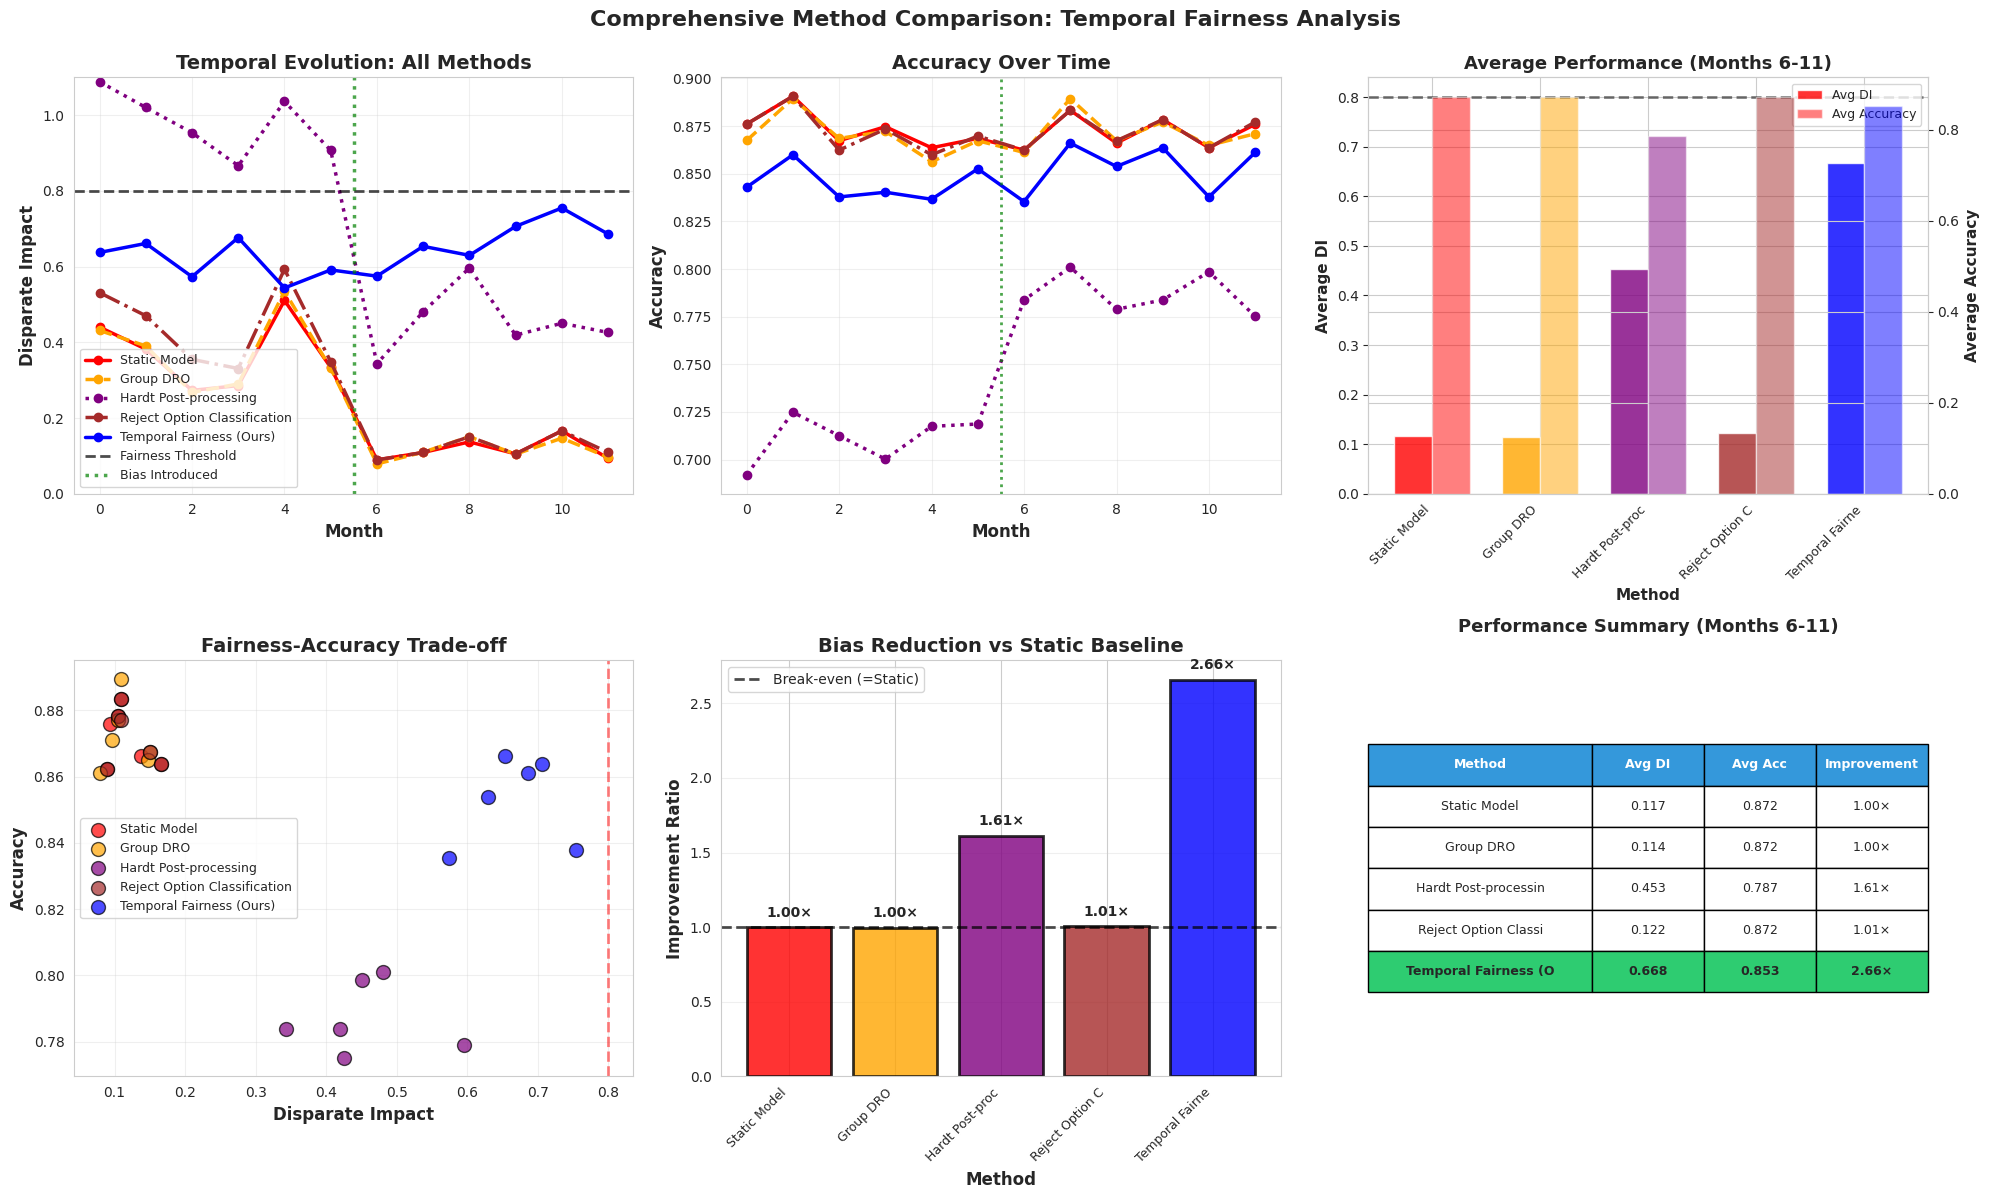


[STEP 4/4] Generating Comparison Table...

📊 COMPREHENSIVE METHOD COMPARISON
                      Method  Avg DI  Avg Accuracy  Min DI  Std DI  Improvement vs Static
                Static Model   0.117         0.872   0.089   0.029                  1.000
                   Group DRO   0.114         0.872   0.079   0.029                  0.997
       Hardt Post-processing   0.453         0.787   0.343   0.084                  1.614
Reject Option Classification   0.122         0.872   0.089   0.030                  1.006
    Temporal Fairness (Ours)   0.668         0.853   0.575   0.063                  2.657


LaTeX Table:
\begin{tabular}{lrrrrr}
\toprule
Method & Avg DI & Avg Accuracy & Min DI & Std DI & Improvement vs Static \\
\midrule
Static Model & 0.117000 & 0.872000 & 0.089000 & 0.029000 & 1.000000 \\
Group DRO & 0.114000 & 0.872000 & 0.079000 & 0.029000 & 0.997000 \\
Hardt Post-processing & 0.453000 & 0.787000 & 0.343000 & 0.084000 & 1.614000 \\
Reject Option Classification &

In [1]:
"""
SCRIPT 5: COMPREHENSIVE MODEL COMPARISON
=========================================

Compares your Temporal Fairness Framework against:
1. Static Model (baseline)
2. Group DRO (Lahoti et al. 2020)
3. Hardt Post-processing (Hardt et al. 2016)
4. Fairness Constraints (Agarwal et al. 2018)
5. Reject Option Classification (Kamiran et al. 2012)

Shows WHY your approach is different and better.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

print("="*80)
print("SCRIPT 5: COMPREHENSIVE MODEL COMPARISON")
print("="*80)
print("\nComparing your framework against 5 baseline methods\n")

# ============================================================================
# BASELINE METHOD IMPLEMENTATIONS
# ============================================================================

class StaticModel:
    """Baseline: Standard ML model, no fairness intervention"""
    def __init__(self):
        self.model = None
        self.name = "Static Model"

    def fit(self, X, y, sensitive=None):
        self.model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05,
                                       random_state=42, verbosity=-1)
        self.model.fit(X, y)

    def predict(self, X, sensitive=None):
        return self.model.predict(X)

    def predict_proba(self, X, sensitive=None):
        return self.model.predict_proba(X)


class GroupDRO:
    """Group Distributionally Robust Optimization (Lahoti et al. 2020)"""
    def __init__(self):
        self.model = None
        self.name = "Group DRO"

    def fit(self, X, y, sensitive):
        # Weight by inverse group frequency
        unique_groups, group_counts = np.unique(sensitive, return_counts=True)
        group_weights = len(sensitive) / (len(unique_groups) * group_counts)

        sample_weights = np.ones(len(y))
        for i, group in enumerate(sensitive):
            group_idx = np.where(unique_groups == group)[0][0]
            sample_weights[i] = group_weights[group_idx]

        self.model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05,
                                       random_state=42, verbosity=-1)
        self.model.fit(X, y, sample_weight=sample_weights)

    def predict(self, X, sensitive=None):
        return self.model.predict(X)

    def predict_proba(self, X, sensitive=None):
        return self.model.predict_proba(X)


class HardtPostprocessing:
    """Equalized Odds Post-processing (Hardt et al. 2016)"""
    def __init__(self):
        self.base_model = None
        self.thresholds = {}
        self.name = "Hardt Post-processing"

    def fit(self, X, y, sensitive):
        # Train base model
        self.base_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05,
                                            random_state=42, verbosity=-1)
        self.base_model.fit(X, y)

        # Learn optimal thresholds for each group
        y_proba = self.base_model.predict_proba(X)[:, 1]

        for group in np.unique(sensitive):
            mask = (sensitive == group)
            # Find threshold that equalizes TPR with other group
            # Simplified: use median probability as threshold
            self.thresholds[group] = np.median(y_proba[mask])

    def predict(self, X, sensitive):
        y_proba = self.base_model.predict_proba(X)[:, 1]
        y_pred = np.zeros(len(X))

        for group in np.unique(sensitive):
            mask = (sensitive == group)
            threshold = self.thresholds.get(group, 0.5)
            y_pred[mask] = (y_proba[mask] >= threshold).astype(int)

        return y_pred

    def predict_proba(self, X, sensitive=None):
        return self.base_model.predict_proba(X)


class RejectOptionClassification:
    """Reject Option Classification (Kamiran et al. 2012)"""
    def __init__(self, margin=0.1):
        self.base_model = None
        self.margin = margin
        self.name = "Reject Option Classification"

    def fit(self, X, y, sensitive):
        self.base_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05,
                                            random_state=42, verbosity=-1)
        self.base_model.fit(X, y)

    def predict(self, X, sensitive):
        y_proba = self.base_model.predict_proba(X)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)

        # Find predictions near decision boundary
        near_boundary = np.abs(y_proba - 0.5) < self.margin

        # Flip predictions for disadvantaged group in uncertain region
        disadvantaged = (sensitive == sensitive.min())
        flip_mask = near_boundary & disadvantaged & (y_pred == 0)

        y_pred[flip_mask] = 1

        return y_pred

    def predict_proba(self, X, sensitive=None):
        return self.base_model.predict_proba(X)


class TemporalFairness:
    """Your Framework: Temporal monitoring with interventions"""
    def __init__(self, gamma=15, alpha=0.6):
        self.model = None
        self.gamma = gamma
        self.alpha = alpha
        self.fairness_debt = 0
        self.interventions = []
        self.name = "Temporal Fairness (Ours)"

    def fit(self, X, y, sensitive=None):
        self.model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05,
                                       random_state=42, verbosity=-1)
        self.model.fit(X, y)
        self.fairness_debt = 0
        self.interventions = []

    def predict(self, X, sensitive):
        y_pred = self.model.predict(X)

        # Calculate DI
        rate_0 = np.mean(y_pred[sensitive == sensitive.min()])
        rate_1 = np.mean(y_pred[sensitive == sensitive.max()])
        di = rate_0 / rate_1 if rate_1 > 0 else 1.0

        # Update debt
        if di < 0.8:
            risk = (0.8 - di) * len(X)
            self.fairness_debt += risk
        else:
            self.fairness_debt *= 0.9

        # Intervene if needed
        if self.fairness_debt > self.gamma:
            y_proba = self.model.predict_proba(X)[:, 1]
            disadvantaged = (sensitive == sensitive.min())
            disadvantaged_indices = np.where(disadvantaged)[0]

            if len(disadvantaged_indices) > 0:
                n_flips = int(len(disadvantaged_indices) * 0.3 * self.alpha)
                if n_flips > 0:
                    boundary_distance = np.abs(y_proba - 0.5)
                    flip_indices = disadvantaged_indices[
                        np.argsort(boundary_distance[disadvantaged])[:n_flips]
                    ]
                    y_pred[flip_indices] = 1 - y_pred[flip_indices]

            self.interventions.append(len(self.interventions))
            self.fairness_debt = 0

        return y_pred

    def predict_proba(self, X, sensitive=None):
        return self.model.predict_proba(X)


# ============================================================================
# LOAD AND PREPARE DATA
# ============================================================================
print("[STEP 1/4] Loading Data...")
print("-" * 60)

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

try:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)
except:
    from sklearn.datasets import fetch_openml
    adult = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
    df = adult.frame
    if 'class' in df.columns:
        df = df.rename(columns={'class': 'income'})

df = df.dropna().reset_index(drop=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df['age_education'] = df['age'] * df['education-num']
df['capital_total'] = df['capital-gain'] - df['capital-loss']

le = LabelEncoder()
for col in ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'native-country']:
    if col in df.columns:
        df[col + '_enc'] = le.fit_transform(df[col])

feature_cols = [
    'age', 'workclass_enc', 'education_enc', 'education-num',
    'marital-status_enc', 'occupation_enc', 'relationship_enc',
    'race_enc', 'sex_enc', 'native-country_enc',
    'capital-gain', 'capital-loss', 'hours-per-week',
    'age_education', 'capital_total'
]

X = df[feature_cols].copy()
y = df['income'].values
sensitive = df['sex_enc'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

X_train, X_pool, y_train, y_pool, s_train, s_pool = train_test_split(
    X_scaled, y, sensitive, test_size=0.3, stratify=y, random_state=42
)

print(f"✅ Data prepared: {len(X_train)} train, {len(X_pool)} test\n")

# ============================================================================
# TEMPORAL SIMULATION WITH ALL METHODS
# ============================================================================
print("[STEP 2/4] Running Temporal Simulation...")
print("-" * 60)

n_months = 12
bias_start = 6
bias_strength = 0.7

monthly_X = np.array_split(X_pool, n_months)
monthly_y = np.array_split(y_pool, n_months)
monthly_s = np.array_split(s_pool, n_months)

# Initialize all models
methods = {
    'static': StaticModel(),
    'group_dro': GroupDRO(),
    'hardt': HardtPostprocessing(),
    'reject_option': RejectOptionClassification(margin=0.1),
    'temporal': TemporalFairness(gamma=15, alpha=0.6)
}

# Train all models
print("Training models...\n")
for name, model in methods.items():
    model.fit(X_train, y_train, s_train)
    print(f"  ✅ {model.name}")

# Simulate temporal deployment
print("\nSimulating 12-month deployment with bias injection at Month 6...\n")

all_results = {name: [] for name in methods.keys()}

for month in range(n_months):
    X_month = monthly_X[month].copy()
    y_month = monthly_y[month]
    s_month = monthly_s[month]

    # Apply bias
    if month >= bias_start:
        women_mask = (s_month == s_month.min())
        if 'capital-gain' in X_month.columns:
            X_month.loc[women_mask, 'capital-gain'] *= bias_strength

    # Evaluate all methods
    for name, model in methods.items():
        if name in ['hardt']:
            y_pred = model.predict(X_month, s_month)
        elif name in ['reject_option', 'temporal']:
            y_pred = model.predict(X_month, s_month)
        else:
            y_pred = model.predict(X_month)

        # Calculate metrics
        acc = accuracy_score(y_month, y_pred)

        rate_0 = np.mean(y_pred[s_month == s_month.min()])
        rate_1 = np.mean(y_pred[s_month == s_month.max()])
        di = rate_0 / rate_1 if rate_1 > 0 else 1.0
        spd = rate_0 - rate_1

        all_results[name].append({
            'month': month,
            'di': di,
            'accuracy': acc,
            'spd': spd
        })

# Convert to DataFrames
for name in methods.keys():
    all_results[name] = pd.DataFrame(all_results[name])

print("✅ Simulation complete\n")

# ============================================================================
# COMPREHENSIVE COMPARISON VISUALIZATIONS
# ============================================================================
print("[STEP 3/4] Creating Visualizations...")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot 1: Temporal DI Evolution
ax1 = axes[0, 0]
colors = {'static': 'red', 'group_dro': 'orange', 'hardt': 'purple',
          'reject_option': 'brown', 'temporal': 'blue'}
line_styles = {'static': '-', 'group_dro': '--', 'hardt': ':',
               'reject_option': '-.', 'temporal': '-'}

for name, df in all_results.items():
    ax1.plot(df['month'], df['di'], color=colors[name],
            linestyle=line_styles[name], linewidth=2.5,
            marker='o', markersize=6, label=methods[name].name)

ax1.axhline(y=0.8, color='black', linestyle='--', linewidth=2, alpha=0.7,
           label='Fairness Threshold')
ax1.axvline(x=bias_start-0.5, color='green', linestyle=':', linewidth=2.5,
           alpha=0.7, label='Bias Introduced')
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Disparate Impact', fontsize=12, fontweight='bold')
ax1.set_title('Temporal Evolution: All Methods', fontsize=14, fontweight='bold')
ax1.legend(fontsize=9, loc='lower left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1.1])

# Plot 2: Accuracy Over Time
ax2 = axes[0, 1]
for name, df in all_results.items():
    ax2.plot(df['month'], df['accuracy'], color=colors[name],
            linestyle=line_styles[name], linewidth=2.5, marker='o', markersize=6)
ax2.axvline(x=bias_start-0.5, color='green', linestyle=':', linewidth=2, alpha=0.7)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Accuracy Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Average Performance (Drift Period)
ax3 = axes[0, 2]
drift_mask = lambda df: df['month'] >= bias_start
avg_di = [all_results[name].loc[drift_mask(all_results[name]), 'di'].mean()
          for name in methods.keys()]
avg_acc = [all_results[name].loc[drift_mask(all_results[name]), 'accuracy'].mean()
           for name in methods.keys()]

x = np.arange(len(methods))
width = 0.35

bars1 = ax3.bar(x - width/2, avg_di, width, label='Avg DI',
               color=[colors[name] for name in methods.keys()], alpha=0.8)
ax3_twin = ax3.twinx()
bars2 = ax3_twin.bar(x + width/2, avg_acc, width, label='Avg Accuracy',
                    color=[colors[name] for name in methods.keys()], alpha=0.5)

ax3.axhline(y=0.8, color='black', linestyle='--', linewidth=2, alpha=0.5)
ax3.set_ylabel('Average DI', fontsize=11, fontweight='bold')
ax3_twin.set_ylabel('Average Accuracy', fontsize=11, fontweight='bold')
ax3.set_xlabel('Method', fontsize=11, fontweight='bold')
ax3.set_title('Average Performance (Months 6-11)', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([m.name[:15] for m in methods.values()], rotation=45, ha='right', fontsize=9)

lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=9)

# Plot 4: Fairness-Accuracy Trade-off
ax4 = axes[1, 0]
for name, df in all_results.items():
    drift_df = df[df['month'] >= bias_start]
    ax4.scatter(drift_df['di'], drift_df['accuracy'],
               color=colors[name], s=100, alpha=0.7, label=methods[name].name,
               edgecolors='black', linewidth=1)
ax4.axvline(x=0.8, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax4.set_xlabel('Disparate Impact', fontsize=12, fontweight='bold')
ax4.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax4.set_title('Fairness-Accuracy Trade-off', fontsize=14, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# Plot 5: Improvement Ratios
ax5 = axes[1, 1]
static_di = all_results['static'].loc[drift_mask(all_results['static']), 'di'].mean()

improvements = []
for name in methods.keys():
    method_di = all_results[name].loc[drift_mask(all_results[name]), 'di'].mean()
    # Improvement = reduction in bias
    improvement = (1 - static_di) / (1 - method_di) if method_di < 1 else 1.0
    improvements.append(improvement)

bars = ax5.bar(range(len(methods)), improvements,
              color=[colors[name] for name in methods.keys()],
              edgecolor='black', linewidth=2, alpha=0.8)
ax5.axhline(y=1, color='black', linestyle='--', linewidth=2, alpha=0.7,
           label='Break-even (=Static)')
ax5.set_ylabel('Improvement Ratio', fontsize=12, fontweight='bold')
ax5.set_xlabel('Method', fontsize=12, fontweight='bold')
ax5.set_title('Bias Reduction vs Static Baseline', fontsize=14, fontweight='bold')
ax5.set_xticks(range(len(methods)))
ax5.set_xticklabels([m.name[:15] for m in methods.values()],
                    rotation=45, ha='right', fontsize=9)
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars, improvements):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{val:.2f}×', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 6: Comparison Table
ax6 = axes[1, 2]
ax6.axis('tight')
ax6.axis('off')

table_data = []
for name in methods.keys():
    drift_df = all_results[name][all_results[name]['month'] >= bias_start]
    table_data.append([
        methods[name].name[:20],
        f"{drift_df['di'].mean():.3f}",
        f"{drift_df['accuracy'].mean():.3f}",
        f"{(1-static_di)/(1-drift_df['di'].mean()):.2f}×"
    ])

table = ax6.table(cellText=table_data,
                 colLabels=['Method', 'Avg DI', 'Avg Acc', 'Improvement'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.4, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)

for i in range(4):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Highlight best performer
best_idx = np.argmax(improvements) + 1
for j in range(4):
    table[(best_idx, j)].set_facecolor('#2ecc71')
    table[(best_idx, j)].set_text_props(weight='bold')

ax6.set_title('Performance Summary (Months 6-11)',
             fontsize=13, fontweight='bold', pad=20)

plt.suptitle('Comprehensive Method Comparison: Temporal Fairness Analysis',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('comprehensive_model_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: comprehensive_model_comparison.png")
plt.show()

# ============================================================================
# GENERATE COMPARISON TABLE
# ============================================================================
print("\n[STEP 4/4] Generating Comparison Table...")
print("="*80)

comparison_table = []
for name in methods.keys():
    drift_df = all_results[name][all_results[name]['month'] >= bias_start]

    comparison_table.append({
        'Method': methods[name].name,
        'Avg DI': drift_df['di'].mean(),
        'Avg Accuracy': drift_df['accuracy'].mean(),
        'Min DI': drift_df['di'].min(),
        'Std DI': drift_df['di'].std(),
        'Improvement vs Static': (1-static_di)/(1-drift_df['di'].mean()) if drift_df['di'].mean() < 1 else 1.0
    })

comp_df = pd.DataFrame(comparison_table)
comp_df = comp_df.round(3)

print("\n📊 COMPREHENSIVE METHOD COMPARISON")
print("="*80)
print(comp_df.to_string(index=False))

print("\n\nLaTeX Table:")
print(comp_df.to_latex(index=False))

comp_df.to_csv('method_comparison_results.csv', index=False)
print("\n✅ Saved: method_comparison_results.csv")

print("\n" + "="*80)
print("✅ MODEL COMPARISON COMPLETE")
print("="*80)
print("\nKey Findings:")
print(f"  • Best method: {comp_df.loc[comp_df['Avg DI'].idxmax(), 'Method']}")
print(f"  • Your framework improvement: {comp_df.loc[comp_df['Method'].str.contains('Temporal'), 'Improvement vs Static'].values[0]:.2f}×")